 # [REDACTED] Assesment 3: Urban Data Mini Project

## Sustainable travel in schools across Leeds

 ## Introduction

The type of travel school children use to get to school can be greatly benefitical to their overall mental and physical health, and has potential to boost their education. The type of travel can be used to increase health in children, improve air quality, reduce traffic congestion and teach children about the importance of caring for our bodies and the planet (Garling, Ettema and Friman, 2014).


This project will investigate how school children across Leeds travel to school, and what factors if any determine this.

### Background
Perceived benefits of active travel to school centre around health, fitness, environmental and social factors (Kirby, J and Inchley J, 2009). These perceived benefits translate to decrease risk of health implications such as heart disease, diabetes and childhood obesity (Laverty et al 2013)(World Health Organisation, 2018).
In 2018 the Global Matrix 3.0 Physical Activity Report Card estimated that somewhere between 27%-33% of children did not meet the 60 minuet day recommendations (Aubert et al, 2018).
Since the 1970s the proportion of overweight children has been increasing across the world, within the UK 15% of Welsh school children are obese and 17% are overweight with projections for a 25% obesity rate by 2050 if no action is taken (Welsh Government, 2015). 
Active travel to schools such as walking or cycling can be an easy and effective way to reach the recomended target. 
Additionally changing the way school children get to school from a passive in the form of motor transport to active transport contributes to environmental sustainability (Woodcock et al, 2009). More active travel can help to reduce traffic congestion around school, which increases the air quality and potentially reduces the risk of school children being involved in accidents. 
The environment in which one travels to school can be hugely important in determining the type of travel taken, and can also have affects on the traveler, on study conducted in the Neatherlands concluded that the higher number of pedestrian crossings, cycle lanes, widened paths and seperated road and pavement infrastructure led to an increase in the proportion of school children who walked or biked to school (De Vries et al, 2010).
Active transport is also the most sustainable option when it comes to travelling, and so should be promoted by schools who wish to educate their pupils on the importance of conserving the planet and ensuring we do not enter a climate disaster (Rabl, 2012).

## Research questions


How do school children across Leeds travel to school?


What determines how school children travel to school?:

Does a factor like the religious status of that school affect travel to school?

Does cycling infrastructure affect how school children travel to school?

 ## Data

We first need to import the relevant packages to enable us to carry out data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import palettable as pltt
import descartes
from pysal.viz import mapclassify 
import statsmodels.api as sm
import scipy.stats as stats
import contextily as cx 
%matplotlib inline
from pysal.lib import weights
from pysal.lib import io
# Importing relevant libaries

C:\Users\leonp\anaconda3\envs\geo_env\Lib\site-packages\pysal\explore\segregation\network\network.py:15: UserWarning: You need pandana and urbanaccess to work with segregation's network module
You can install them with  `pip install urbanaccess pandana` or `conda install -c udst pandana urbanaccess`
  warn(
C:\Users\leonp\anaconda3\envs\geo_env\Lib\site-packages\pysal\model\spvcm\abstracts.py:10: UserWarning: The `dill` module is required to use the sqlite backend fully.
  from .sqlite import head_to_sql, start_sql


Below are the datasets which gives us infomation on the different transport methods taken to get to school, and the dataset which connects the school name to the DfE code. 

In [2]:
Leeds_Schools = pd.read_csv("MOT_Leeds_Schools_2019.csv", encoding = 'latin-1', index_col = "School Name")
# Importing the csv file for method of transport for primary school children in Leeds.
# Note MOT here stands for mode of transort, not Ministry of Transport.
# Additionally, I had to use encoding = 'latin-1' as there was a problem with the Unicode Detector Error 

# index_col = 'School Name' sets the School Name column as the index

Leeds_Schools.head(3) # to check the data has correctly imported

DfE  \
School Name                                                   
Aberford Church of England Voluntary Controlled...  3833030   
Adel Primary School                                 3832416   
Adel St John The Baptist Church of England Prim...  3833902   

                                                    Bus (type not known)  \
School Name                                                                
Aberford Church of England Voluntary Controlled...                   NaN   
Adel Primary School                                                  NaN   
Adel St John The Baptist Church of England Prim...                   1.0   

                                                    Car Share  Car/Van  Cycle  \
School Name                                                                     
Aberford Church of England Voluntary Controlled...        9.0       11    NaN   
Adel Primary School                                       NaN      140    6.0   
Adel St John The Baptist Church of England Prim...        5.0      142    1.0   

                                                    Dedicated School Bus  \
School Name                                                                
Aberford Church of England Voluntary Controlled...                   NaN   
Adel Primary School                                                  NaN   
Adel St John The Baptist Church of England Prim...                   NaN   

                                                    Other  Public Bus Service  \
School Name                                                                     
Aberford Church of England Voluntary Controlled...    NaN                 NaN   
Adel Primary School                                   NaN                 4.0   
Adel St John The Baptist Church of England Prim...    NaN                 2.0   

                                                    Taxi  Train  Walk  \
School Name                                                             
Aberford Church of England Voluntary Controlled...   NaN    NaN  66.0   
Adel Primary School                                  NaN    NaN  78.0   
Adel St John The Baptist Church of England Prim...   NaN    NaN  59.0   

                                                    Grand Total  
School Name                                                      
Aberford Church of England Voluntary Controlled...           86  
Adel Primary School                                         228  
Adel St John The Baptist Church of England Prim...          210

In [3]:
LOCATION_DF = pd.read_csv("Schools_DfE_URN.csv")
LOCATION_DF.head(3)
# As I was unable to obtain a dataset which contains a DfE code and a postcode in one, I am having to resort to using a df
# which has the names of ALL schools in Leeds and their postcode (the DfE code here is different to the one in Leeds_Schools)
# so can't be used for comparison, however all of the school names in LOCATION_DF match those in Leeds_Schools
# LOCATION_DF contains both postcodes, MSOA, ward and constituency which can be used for visualisating the location 

DfE  DfE_Old       URN   URN_Old  \
0     8   5400.0  137083.0  108101.0   
1  3030   3030.0  107985.0  107985.0   
2  2416   2416.0  107892.0  107892.0   

                                              School OpenOrClosed      Phase  \
0             Abbey Grange Church of England Academy         Open  Secondary   
1  Aberford Church of England Voluntary Controlle...         Open    Primary   
2                                Adel Primary School         Open    Primary   

                           TypeDetail ReligiousCharacter            Years  \
0                           Academies  Church of England     Year7-Year13   
1  Local authority maintained schools  Church of England  Reception-Year6   
2  Local authority maintained schools     Does not apply    Nursery-Year6   

  Postcode lsoa01     lsoa11           Ward_new        Constituency  \
0  LS165EA    NaN  E01011686          Kirkstall          Leeds West   
1  LS253BU    NaN  E01011297           Harewood  Elmet and Rothwell   
2  LS168DY    NaN  E01011385  Adel & Wharfedale    Leeds North West   

                    ClusterThisYear         X         Y  
0  Headingley-Kirkstall partnership  425647.0  437660.0  
1                          Garforth  443232.0  437054.0  
2                              ESNW  428005.0  439325.0

The Leeds_Schools dataset was obtained from data.gov.uk, published by Leeds City Council in October 2019. The Influencing Behaviour Team (ITB) collected the data to aid road safety education, training and publicity to schools to promote sustainable travel. It is collected via a SIMS (School Infomation Management System) report or excel spreadsheet, and features 10 categories for transport modes. It provides data on the mode of transport dependant on the school and is available at https://www.data.gov.uk/dataset/b3ff9108-e249-430e-9e42-960c2dbfc96c/leeds-schools-all-information     ( if the other link fails https://www.data.gov.uk/dataset/a618b2be-b64d-45e3-bb9b-f3ee7622af75/school-mode-of-travel )

The LOCATION_DF dataset was obtained from data.gov.uk and was published by Leeds City Council in November 2018 under a government open licence. It collected infomation on schools across the UK including ones in Leeds, and contains location data such as lsoa11 code, coordinates, and postcode which can be used to plot the schools onto a map by using a common id, it is available at https://www.data.gov.uk/dataset/b3ff9108-e249-430e-9e42-960c2dbfc96c/leeds-schools-all-information  

 ## Data Wrangling,  Stats and Visualisation

In [4]:
Leeds_Schools.head(3) # displaying the top 3 rows of the Leeds_Schools dataset

DfE  \
School Name                                                   
Aberford Church of England Voluntary Controlled...  3833030   
Adel Primary School                                 3832416   
Adel St John The Baptist Church of England Prim...  3833902   

                                                    Bus (type not known)  \
School Name                                                                
Aberford Church of England Voluntary Controlled...                   NaN   
Adel Primary School                                                  NaN   
Adel St John The Baptist Church of England Prim...                   1.0   

                                                    Car Share  Car/Van  Cycle  \
School Name                                                                     
Aberford Church of England Voluntary Controlled...        9.0       11    NaN   
Adel Primary School                                       NaN      140    6.0   
Adel St John The Baptist Church of England Prim...        5.0      142    1.0   

                                                    Dedicated School Bus  \
School Name                                                                
Aberford Church of England Voluntary Controlled...                   NaN   
Adel Primary School                                                  NaN   
Adel St John The Baptist Church of England Prim...                   NaN   

                                                    Other  Public Bus Service  \
School Name                                                                     
Aberford Church of England Voluntary Controlled...    NaN                 NaN   
Adel Primary School                                   NaN                 4.0   
Adel St John The Baptist Church of England Prim...    NaN                 2.0   

                                                    Taxi  Train  Walk  \
School Name                                                             
Aberford Church of England Voluntary Controlled...   NaN    NaN  66.0   
Adel Primary School                                  NaN    NaN  78.0   
Adel St John The Baptist Church of England Prim...   NaN    NaN  59.0   

                                                    Grand Total  
School Name                                                      
Aberford Church of England Voluntary Controlled...           86  
Adel Primary School                                         228  
Adel St John The Baptist Church of England Prim...          210

The Leeds_Schools dataset provides the school name and unique DfE (Department of Education) code of a number of schools in Leeds, along with the mode of transport the pupils take. The DfE or School Name can be used to match this dataset to another to assign the values to a location, using the means of postcodes, MSOAs or coordinates. 

There appear to be some NaN (not a number) values in the data frame (df). The .isnull().any() method checks for missing values ( represented by a "NaN" value ) accross the df .By using the command below we can check for any NaN values specific to the columns / series contain missing values.

In [5]:
Leeds_Schools.isnull().any() 
# Checks the dataset for any missing values

DfE                     False
Bus (type not known)     True
Car Share                True
Car/Van                 False
Cycle                    True
Dedicated School Bus     True
Other                    True
Public Bus Service       True
Taxi                     True
Train                    True
Walk                     True
Grand Total             False
dtype: bool

There are NaN values is most of the columns of the df. The NaN values stem from the there being a value of 0 recorded which was corresondingley left blank to represent 0 values in the csv file, which Pandas reads as NaN. This needs to be converted into 0. 

The only columns fully completed are "DfE", "Car/Van" and "Grand Total".

In [6]:
Leeds_Schools = Leeds_Schools.fillna(0) 
# replaces all of the NaN values in the specified columns with 0

Leeds_Schools.head(3) # calling df.head() to check it has worked

DfE  \
School Name                                                   
Aberford Church of England Voluntary Controlled...  3833030   
Adel Primary School                                 3832416   
Adel St John The Baptist Church of England Prim...  3833902   

                                                    Bus (type not known)  \
School Name                                                                
Aberford Church of England Voluntary Controlled...                   0.0   
Adel Primary School                                                  0.0   
Adel St John The Baptist Church of England Prim...                   1.0   

                                                    Car Share  Car/Van  Cycle  \
School Name                                                                     
Aberford Church of England Voluntary Controlled...        9.0       11    0.0   
Adel Primary School                                       0.0      140    6.0   
Adel St John The Baptist Church of England Prim...        5.0      142    1.0   

                                                    Dedicated School Bus  \
School Name                                                                
Aberford Church of England Voluntary Controlled...                   0.0   
Adel Primary School                                                  0.0   
Adel St John The Baptist Church of England Prim...                   0.0   

                                                    Other  Public Bus Service  \
School Name                                                                     
Aberford Church of England Voluntary Controlled...    0.0                 0.0   
Adel Primary School                                   0.0                 4.0   
Adel St John The Baptist Church of England Prim...    0.0                 2.0   

                                                    Taxi  Train  Walk  \
School Name                                                             
Aberford Church of England Voluntary Controlled...   0.0    0.0  66.0   
Adel Primary School                                  0.0    0.0  78.0   
Adel St John The Baptist Church of England Prim...   0.0    0.0  59.0   

                                                    Grand Total  
School Name                                                      
Aberford Church of England Voluntary Controlled...           86  
Adel Primary School                                         228  
Adel St John The Baptist Church of England Prim...          210

In [7]:
Leeds_Schools = Leeds_Schools.astype(int) 
# converting the columns we want into whole numbers, as the only non numerical column has been assigned as the index we can
# call the .astype(int) function on the whole df
Leeds_Schools.head(3)

DfE  \
School Name                                                   
Aberford Church of England Voluntary Controlled...  3833030   
Adel Primary School                                 3832416   
Adel St John The Baptist Church of England Prim...  3833902   

                                                    Bus (type not known)  \
School Name                                                                
Aberford Church of England Voluntary Controlled...                     0   
Adel Primary School                                                    0   
Adel St John The Baptist Church of England Prim...                     1   

                                                    Car Share  Car/Van  Cycle  \
School Name                                                                     
Aberford Church of England Voluntary Controlled...          9       11      0   
Adel Primary School                                         0      140      6   
Adel St John The Baptist Church of England Prim...          5      142      1   

                                                    Dedicated School Bus  \
School Name                                                                
Aberford Church of England Voluntary Controlled...                     0   
Adel Primary School                                                    0   
Adel St John The Baptist Church of England Prim...                     0   

                                                    Other  Public Bus Service  \
School Name                                                                     
Aberford Church of England Voluntary Controlled...      0                   0   
Adel Primary School                                     0                   4   
Adel St John The Baptist Church of England Prim...      0                   2   

                                                    Taxi  Train  Walk  \
School Name                                                             
Aberford Church of England Voluntary Controlled...     0      0    66   
Adel Primary School                                    0      0    78   
Adel St John The Baptist Church of England Prim...     0      0    59   

                                                    Grand Total  
School Name                                                      
Aberford Church of England Voluntary Controlled...           86  
Adel Primary School                                         228  
Adel St John The Baptist Church of England Prim...          210

In [8]:
Leeds_Schools.isnull().any()
# To check all columns have valid data, all should display False

DfE                     False
Bus (type not known)    False
Car Share               False
Car/Van                 False
Cycle                   False
Dedicated School Bus    False
Other                   False
Public Bus Service      False
Taxi                    False
Train                   False
Walk                    False
Grand Total             False
dtype: bool

In [9]:
# if we check the .info() again, we can see all floats have been converted into intigers 
# and the memory useage has gone down significantly, making the df quicker to work with
Leeds_Schools.info()

<class 'pandas.core.frame.DataFrame'>
Index: 226 entries, Aberford Church of England Voluntary Controlled Primary School to Whitkirk Primary School
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   DfE                   226 non-null    int32
 1   Bus (type not known)  226 non-null    int32
 2   Car Share             226 non-null    int32
 3   Car/Van               226 non-null    int32
 4   Cycle                 226 non-null    int32
 5   Dedicated School Bus  226 non-null    int32
 6   Other                 226 non-null    int32
 7   Public Bus Service    226 non-null    int32
 8   Taxi                  226 non-null    int32
 9   Train                 226 non-null    int32
 10  Walk                  226 non-null    int32
 11  Grand Total           226 non-null    int32
dtypes: int32(12)
memory usage: 12.4+ KB


In [10]:
Leeds_Schools_DfE = Leeds_Schools.pop("DfE") 
# Removing the DfE column ready for visualisation

In [11]:
Leeds_Schools_DfE.head()
# check it has worked

School Name
Aberford Church of England Voluntary Controlled Primary School    3833030
Adel Primary School                                               3832416
Adel St John The Baptist Church of England Primary School         3833902
Allerton Bywater Primary School                                   3832507
Allerton Church Of England Primary School                         3833931
Name: DfE, dtype: int32

Now the DfE column has been removed for the time being, we can inspect the columns before joining them to their location data

In [12]:
Leeds_Schools.head(3)
# Calling head to check Leeds_Schools is ready

Bus (type not known)  \
School Name                                                                
Aberford Church of England Voluntary Controlled...                     0   
Adel Primary School                                                    0   
Adel St John The Baptist Church of England Prim...                     1   

                                                    Car Share  Car/Van  Cycle  \
School Name                                                                     
Aberford Church of England Voluntary Controlled...          9       11      0   
Adel Primary School                                         0      140      6   
Adel St John The Baptist Church of England Prim...          5      142      1   

                                                    Dedicated School Bus  \
School Name                                                                
Aberford Church of England Voluntary Controlled...                     0   
Adel Primary School                                                    0   
Adel St John The Baptist Church of England Prim...                     0   

                                                    Other  Public Bus Service  \
School Name                                                                     
Aberford Church of England Voluntary Controlled...      0                   0   
Adel Primary School                                     0                   4   
Adel St John The Baptist Church of England Prim...      0                   2   

                                                    Taxi  Train  Walk  \
School Name                                                             
Aberford Church of England Voluntary Controlled...     0      0    66   
Adel Primary School                                    0      0    78   
Adel St John The Baptist Church of England Prim...     0      0    59   

                                                    Grand Total  
School Name                                                      
Aberford Church of England Voluntary Controlled...           86  
Adel Primary School                                         228  
Adel St John The Baptist Church of England Prim...          210

In [13]:
Leeds_Schools.describe()
# from the .describe() table we can see the mean number of Primary school children in Leeds based on their mode of transport
# to school. Additionally it is useful to see that the count is the same (226) for all columns so we know the data is
# distributed equally

Bus (type not known)   Car Share     Car/Van       Cycle  \
count            226.000000  226.000000  226.000000  226.000000   
mean               7.867257    7.420354  125.513274    2.672566   
std               31.173209   15.741956  105.892030    6.940948   
min                0.000000    0.000000    2.000000    0.000000   
25%                0.000000    0.000000   59.250000    0.000000   
50%                1.000000    2.000000   96.000000    1.000000   
75%                3.000000    7.000000  164.000000    3.000000   
max              365.000000  141.000000  737.000000   64.000000   

       Dedicated School Bus       Other  Public Bus Service        Taxi  \
count            226.000000  226.000000          226.000000  226.000000   
mean              31.769912    1.433628           26.433628    2.584071   
std              113.974423   12.319723           67.677914   11.263097   
min                0.000000    0.000000            0.000000    0.000000   
25%                0.000000    0.000000            0.000000    0.000000   
50%                0.000000    0.000000            4.000000    1.000000   
75%                1.750000    1.000000           14.000000    2.000000   
max              735.000000  184.000000          473.000000  161.000000   

            Train        Walk  Grand Total  
count  226.000000   226.00000   226.000000  
mean     1.681416   227.19469   434.570796  
std     17.815232   184.81892   342.336387  
min      0.000000     0.00000     6.000000  
25%      0.000000   116.00000   216.500000  
50%      0.000000   175.50000   320.000000  
75%      0.000000   301.75000   472.750000  
max    256.000000  1278.00000  2288.000000

In [14]:
pd.options.display.max_rows = None
# to be able to view all the rows so we can scroll down the school df by descending student count
# this will be needed for the next line of code

In [15]:
Leeds_Schools.sort_values(by = 'Grand Total', ascending = False)
 # checking the highest value for the "Grand Total" column for the schools in the df
 # As also displayed in df.describe() the the most amount of pupils in a school is 2288, the code above allows us to
 # inspect which school this is and see the follow up schools

Bus (type not known)  \
School Name                                                                
Roundhay School All-through education from 4-18                       87   
Woodkirk Academy                                                       3   
Abbey Grange Acadmey                                                   0   
Allerton Grange School                                                 0   
Prince Henry's Grammar School                                         62   
Rodillian Academy                                                     20   
The Morley Academy                                                    46   
Benton Park School                                                     8   
Horsforth School                                                       2   
Guiseley School                                                        8   
Allerton High School                                                  14   
St MaryÕs Menston, A Catholic Voluntary Academy                        2   
The Farnley Academy                                                   55   
Carr Manor Community School (Secondary Site)                         216   
Cockburn School                                                       68   
Co-Operative Academy Priesthorpe                                      81   
Ruth Gorse Academy                                                    50   
Brigshaw High School and Language College                             68   
Lawnswood School                                                       1   
Leeds Grammar School                                                   0   
Royds School                                                         365   
Mount St Mary's Catholic High School                                  98   
Cardinal Heenan Catholic High School                                   2   
Boston Spa Academy                                                    17   
Crawshaw Academy                                                      10   
Methley Primary School                                                 0   
Hovingham Primary School                                               2   
John Smeaton Academy                                                   9   
Ralph Thoresby School                                                  4   
St Bartholomew's Church of England Voluntary Co...                     9   
Westerton Primary Academy                                              0   
Beeston Primary School                                                 1   
Morley Newlands Academy                                                3   
Bruntcliffe Academy                                                    0   
Sharp Lane Primary School                                              2   
Allerton Church Of England Primary School                              3   
Richmond Hill Primary School                                           1   
Bankside Primary School                                                0   
Wetherby High School                                                   2   
Shakespeare Primary School                                             1   
Little London Community Primary School and Nursery                     2   
Gledhow Primary School                                                 1   
Hugh Gaitskell Primary School                                         29   
Bishop Young Church Of England Academy                                 9   
Carr Manor Primary School                                              4   
Pudsey Grangefield Mathematics and Computing Co...                    18   
Chapel Allerton Primary School                                        18   
Bracken Edge Primary School                                            5   
Pudsey Primrose                                                        0   
Southroyd Primary and Nursery School                                   0   
Greenmount Primary School                                              1   
Talbot Primary School   

In [16]:
Student_Total = Leeds_Schools["Grand Total"] # creating a sub for the total number of students for each school
Student_Total.head(3) # checking it has worked

School Name
Aberford Church of England Voluntary Controlled Primary School     86
Adel Primary School                                               228
Adel St John The Baptist Church of England Primary School         210
Name: Grand Total, dtype: int32

In [17]:
Student_Total.sort_values(ascending = False)  # checking it has worked, schools are displayed in highest to lowest 
 # number of students

School Name
Roundhay School All-through education from 4-18                              2288
Woodkirk Academy                                                             1812
Abbey Grange Acadmey                                                         1599
Allerton Grange School                                                       1485
Prince Henry's Grammar School                                                1482
Rodillian Academy                                                            1471
The Morley Academy                                                           1432
Benton Park School                                                           1399
Horsforth School                                                             1355
Guiseley School                                                              1330
Allerton High School                                                         1251
St MaryÕs Menston, A Catholic Voluntary Academy                              1247
The 

By sorting the values in ascending order we can see the school with the largest amount of pupils is Roundhay All-through school, which from the name tells us they have pupils aged 4-18, which is the reason behind the high pupil total, and on the contarary some of the schools with the lowest amount of reported pupils are Free Schools (schools ran by charaties, parents or faith groups rather than the local authority ) and a School for the deaf.

<AxesSubplot: >

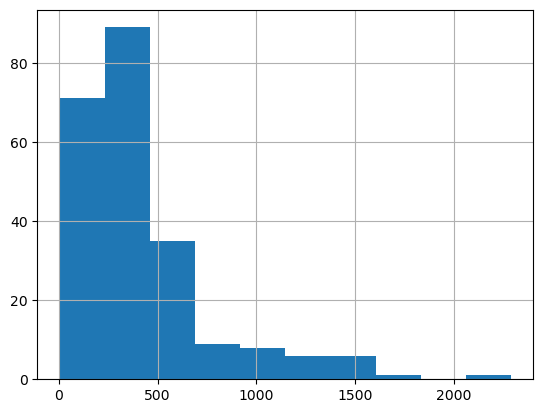

In [18]:
Student_Total.hist() # one way of visualising the total students distribtion between schools

In [19]:
Student_Total.describe()

count     226.000000
mean      434.570796
std       342.336387
min         6.000000
25%       216.500000
50%       320.000000
75%       472.750000
max      2288.000000
Name: Grand Total, dtype: float64

Despite the maxinum and mininum number of students in a school having a large discrepancy, the histogram and .describe() functions above show that the mean number of students (rounded the a whole number as you can't have half a student) in each school is 435.

In [20]:
Quantile05 = Student_Total.quantile(0.05) 
Quantile10 = Student_Total.quantile(0.10)
Quantile20 = Student_Total.quantile(0.20)
Quantile50 = Student_Total.quantile(0.50)
Quantile80 = Student_Total.quantile(0.80)
Quantile90 = Student_Total.quantile(0.90)
Quantile95 = Student_Total.quantile(0.95)

print (Quantile05, Quantile10, Quantile20, Quantile50, Quantile80, Quantile90, Quantile95)

136.0 185.0 210.0 320.0 524.0 902.0 1243.75


Furthermore as shown in the quantile ranges above (in incraments of 5,10,20,50,80,90, and 95 %) most of the schools have roughly between 200 - 500 students (using the 20th and 80th percentile for the range).

#### This is better visualised later on after the data sets have been more throughily cleaned and subsequently merged

In [21]:
import seaborn as sns 
import matplotlib.pyplot as plt
import geopandas as gpd
import palettable as pltt
import descartes
from pysal.viz import mapclassify 
import statsmodels.api as sm
import scipy.stats as stats
from matplotlib_scalebar.scalebar import ScaleBar
# importing the relevant libarys for later on

### Moving onto the modes of transport and merging the Leeds_School df to the LOCATION_DF

In [22]:
Leeds_Schools.head(1) # checking which columns can be used to merge

Bus (type not known)  \
School Name                                                                
Aberford Church of England Voluntary Controlled...                     0   

                                                    Car Share  Car/Van  Cycle  \
School Name                                                                     
Aberford Church of England Voluntary Controlled...          9       11      0   

                                                    Dedicated School Bus  \
School Name                                                                
Aberford Church of England Voluntary Controlled...                     0   

                                                    Other  Public Bus Service  \
School Name                                                                     
Aberford Church of England Voluntary Controlled...      0                   0   

                                                    Taxi  Train  Walk  \
School Name                                                             
Aberford Church of England Voluntary Controlled...     0      0    66   

                                                    Grand Total  
School Name                                                      
Aberford Church of England Voluntary Controlled...           86

In [23]:
LOCATION_DF.head(1)

DfE  DfE_Old       URN   URN_Old                                  School  \
0    8   5400.0  137083.0  108101.0  Abbey Grange Church of England Academy   

  OpenOrClosed      Phase TypeDetail ReligiousCharacter         Years  \
0         Open  Secondary  Academies  Church of England  Year7-Year13   

  Postcode lsoa01     lsoa11   Ward_new Constituency  \
0  LS165EA    NaN  E01011686  Kirkstall   Leeds West   

                    ClusterThisYear         X         Y  
0  Headingley-Kirkstall partnership  425647.0  437660.0

First the index name in Leeds_Schools has to match the column name in LOCATION_DF, I have chosen to do it this way around for simplicity of calling both of them "School".

In [24]:
Leeds_Schools.index.name = "School" #renaming the index from "School Name" to simply "School"

In [25]:
Leeds_Schools.head(1)
#checking it has changed

Bus (type not known)  \
School                                                                     
Aberford Church of England Voluntary Controlled...                     0   

                                                    Car Share  Car/Van  Cycle  \
School                                                                          
Aberford Church of England Voluntary Controlled...          9       11      0   

                                                    Dedicated School Bus  \
School                                                                     
Aberford Church of England Voluntary Controlled...                     0   

                                                    Other  Public Bus Service  \
School                                                                          
Aberford Church of England Voluntary Controlled...      0                   0   

                                                    Taxi  Train  Walk  \
School                                                                  
Aberford Church of England Voluntary Controlled...     0      0    66   

                                                    Grand Total  
School                                                           
Aberford Church of England Voluntary Controlled...           86

In [26]:
LOCATION_DF.isnull().any() # checking for any Null values in the columns

DfE                   False
DfE_Old                True
URN                    True
URN_Old                True
School                False
OpenOrClosed          False
Phase                 False
TypeDetail             True
ReligiousCharacter     True
Years                  True
Postcode               True
lsoa01                 True
lsoa11                 True
Ward_new               True
Constituency           True
ClusterThisYear        True
X                      True
Y                      True
dtype: bool

In [27]:
LOCATION_DF
# lots of columns can be deleted as they do not provide any relevant infomation, or are a potential risk to breaking the code
# so I am deleting as they kept breaking the code and are not needed since they are the wrong DfE for Leeds_Schools

DfE  DfE_Old       URN   URN_Old  \
0       8   5400.0  137083.0  108101.0   
1    3030   3030.0  107985.0  107985.0   
2    2416   2416.0  107892.0  107892.0   
3    3902   3902.0  108041.0  108041.0   
4    3909   3909.0  108048.0  108048.0   
5    2507   2507.0  143242.0  107983.0   
6    3931   3931.0  135210.0  135210.0   
7    4040   4040.0  108058.0  108058.0   
8    4032   4032.0  108057.0  108057.0   
9    2436   2436.0  107912.0  107912.0   
10   2484   2484.0  107960.0  107960.0   
11   2401   2401.0  107877.0  107877.0   
12   2512   2512.0  132795.0  132795.0   
13   2463   2463.0  146213.0  107939.0   
14   2425   2425.0  107901.0  107901.0   
15   2385   2385.0  107868.0  107868.0   
16   3033   3033.0  107987.0  107987.0   
17   2444   2444.0  107920.0  107920.0   
18   2407   2407.0  107883.0  107883.0   
19   3913   3913.0  108052.0  108052.0   
20   2470   2470.0  107946.0  107946.0   
21   4106   4106.0  108083.0  108083.0   
22   2369   2369.0  107863.0  107863.0   
23   4076   6905.0  144809.0  131898.0   
24   2025   3918.0  146102.0  134406.0   
25   2408   2408.0  107884.0  107884.0   
26   4114   4114.0  108091.0  108091.0   
27   2433   2433.0  107909.0  107909.0   
28   2329   2329.0  107844.0  107844.0   
29   2406   2406.0  107882.0  107882.0   
30   2030   2485.0  146542.0  107961.0   
31   3054   3054.0  108003.0  108003.0   
32   4113   4113.0  143238.0  108090.0   
33   2398   2398.0  107874.0  107874.0   
34   3915   3915.0  108054.0  108054.0   
35   2007   2445.0  138986.0  107921.0   
36   2409   2409.0  107885.0  107885.0   
37   4071   4109.0  142056.0  108086.0   
38   3052   3052.0  108001.0  108001.0   
39   3046   3046.0  107996.0  107996.0   
40   2028   2301.0  146540.0  107826.0   
41   4751   4751.0  108095.0  108095.0   
42   2308   2308.0  107830.0  107830.0   
43   8902   4041.0       NaN       NaN   
44   4041   4041.0  108059.0  108059.0   
45   2437   2437.0  107913.0  107913.0   
46   2486   2486.0  107962.0  107962.0   
47   2427   2427.0  107903.0  107903.0   
48   2027   3055.0  146306.0  108004.0   
49   2020   3369.0  144824.0  108023.0   
50   2286   2286.0  107820.0  107820.0   
51   2482   2482.0  107958.0  107958.0   
52   2487   2487.0  107963.0  107963.0   
53   4077   6907.0  145927.0  145927.0   
54   4047   4047.0  142585.0  108065.0   
55   3357   3357.0  108011.0  108011.0   
56   2453   2453.0  146233.0  107929.0   
57   3903   3903.0  108042.0  108042.0   
58   2418   2418.0  107894.0  107894.0   
59   2022   2326.0  145306.0  107841.0   
60   4110   4110.0  144588.0  108087.0   
61   4752   4752.0  108096.0  108096.0   
62   3370   3370.0  108024.0  108024.0   
63   2006   2472.0  138973.0  107948.0   
64   4107   4107.0  138304.0  108084.0   
65   2458   2458.0  107934.0  107934.0   
66   2347   2347.0  107854.0  107854.0   
67   2400   2400.0  107876.0  107876.0   
68   7000   4075.0  144743.0  144743.0   
69   3921   3921.0  134407.0  134407.0   
70   2504   2504.0  142423.0  107980.0   
71   2395   2395.0  140068.0  107871.0   
72   7015   7015.0  108119.0  108119.0   
73   2018   2446.0  142629.0  107922.0   
74   2024   8904.0  145879.0       NaN   
75   4070   4070.0  141940.0  141940.0   
76   2505   2505.0  107981.0  107981.0   
77   2338   2338.0  107849.0  107849.0   
78   2469   2469.0  107945.0  107945.0   
79   2492   2492.0  107968.0  107968.0   
80   3926   3926.0  134973.0  134973.0   
81   4112   4112.0  136343.0  108089.0   
82   2336   2336.0  107848.0  107848.0   
83   2428   2428.0  107904.0  107904.0   
84   2447   2447.0  107923.0  107923.0   
85   3925   3925.0  134913.0  134913.0   
86   2396   2396.0  136326.0  107872.0   
87   2499   2499.0  107975.0  107975.0   
88   2473   2473.0  107949.0  107949.0   
89   2303   2303.0  107828.0  107828.0   
90   2448   2448.0  107924.0  107924.0   
91   2270   2270.0  107809.0  107809.0   
92   4108   4108.0  108085.0  108085.0   
93   2449   2449.0  107925.0  107925.0   
94   3037   3037

In [28]:
del LOCATION_DF["DfE"] # deleting incorrect location codes
del LOCATION_DF["DfE_Old"]

In [29]:
del LOCATION_DF["URN"] # deleting a different set of incorrect location codes
del LOCATION_DF["URN_Old"]

In [30]:
LOCATION_DF["ReligiousCharacter"].value_counts()
# ReligigiousCharactter could be useful for analysising transport modes 
# based on the religion of the school, so I will update the None value
# (currently NaN) to reflect 'No Infomation'. 

Does not apply       181
Church of England     41
None                  35
Roman Catholic        31
Jewish                 2
Name: ReligiousCharacter, dtype: int64

In [31]:
LOCATION_DF["ReligiousCharacter"].fillna("No Info", inplace = True) # replacing all the NaN values (which were left blank)
 # with "No Info" so they can later be used and counted during analysis

In [32]:
LOCATION_DF["ReligiousCharacter"].value_counts()
# Checking it has worked

No Info              401
Does not apply       181
Church of England     41
None                  35
Roman Catholic        31
Jewish                 2
Name: ReligiousCharacter, dtype: int64

In [33]:
LOCATION_DF["OpenOrClosed"].value_counts()
# Closed schools are of no use so can be deleted, however this column
# also needs cleaning as some values are not capitalised. 

Closed              392
Open                286
closed                7
Proposed to open      3
open                  2
Open                  1
Name: OpenOrClosed, dtype: int64

In [34]:
LOCATION_DF["OpenOrClosed"] = LOCATION_DF["OpenOrClosed"].str.title()
# All names are now displayed with capital letters (.title() )

In [35]:
LOCATION_DF = LOCATION_DF[LOCATION_DF["OpenOrClosed"] != "Closed"]
LOCATION_DF = LOCATION_DF[LOCATION_DF["OpenOrClosed"] != "Proposed To Open"]

In [36]:
LOCATION_DF["OpenOrClosed"].replace("Open", "Open", inplace = True)
# Attempting to merge the multiple "Open"

In [37]:
LOCATION_DF["OpenOrClosed"].value_counts() 
# Everything apart from Open has been removed, however there appears to be
# one Open distancing itself from the rest

Open     288
Open       1
Name: OpenOrClosed, dtype: int64

In [38]:
LOCATION_DF.isnull().any()
# Checking for NaN values, as this can cause problems when merging, the school name is the most important column here, as 
# this is the one we will be using to merge the datasets. Unfortunatley it appears that there are Postcodes and other
# location data missing. 

School                False
OpenOrClosed          False
Phase                 False
TypeDetail            False
ReligiousCharacter    False
Years                 False
Postcode              False
lsoa01                 True
lsoa11                False
Ward_new              False
Constituency           True
ClusterThisYear       False
X                     False
Y                     False
dtype: bool

In [39]:
#if all(Leeds_Schools.index == LOCATION_DF['School']):
#    print ("Columns are ready to be merged")
#else: 
#    print("Columns are not ready to be merged")

The error code above shows that the datasets are not yet of equal length. 

In [40]:
mask = LOCATION_DF["School"].isin(Leeds_Schools.index)
# creating a boolean mask to filter the rows in LOCATION_DF ["School"] to match those in Leeds_Schools index

In [41]:
matching_schools = LOCATION_DF[mask]
# using the mask to filter the rows in LOCATION_DF

In [42]:
merged_df1 = Leeds_Schools.merge(matching_schools, left_index= True, right_on="School")
# merging the Leeds_Schools df with the matching rows in LOCATION_DF

In [43]:
merged_df1.count()

Bus (type not known)    162
Car Share               162
Car/Van                 162
Cycle                   162
Dedicated School Bus    162
Other                   162
Public Bus Service      162
Taxi                    162
Train                   162
Walk                    162
Grand Total             162
School                  162
OpenOrClosed            162
Phase                   162
TypeDetail              162
ReligiousCharacter      162
Years                   162
Postcode                162
lsoa01                    0
lsoa11                  162
Ward_new                162
Constituency            162
ClusterThisYear         162
X                       162
Y                       162
dtype: int64

In [44]:
LOCATION_DF

School OpenOrClosed  \
0               Abbey Grange Church of England Academy         Open   
1    Aberford Church of England Voluntary Controlle...         Open   
2                                  Adel Primary School         Open   
3    Adel St John the Baptist Church of England Pri...         Open   
4    All Saint's Richmond Hill Church of England Pr...         Open   
5                      Allerton Bywater Primary School         Open   
6                         Allerton CofE Primary School         Open   
7                               Allerton Grange School         Open   
8                                 Allerton High School         Open   
9                             Alwoodley Primary School         Open   
10                               Armley Primary School         Open   
11                             Ashfield Primary School         Open   
12                              Asquith Primary School         Open   
13                            Austhorpe Primary School         Open   
14                             Bankside Primary School         Open   
15                              Bardsey Primary School         Open   
16   Barwick-in-Elmet Church of England Voluntary C...         Open   
17                            Beechwood Primary School         Open   
18                             Beecroft Primary School         Open   
19   Beeston Hill St Luke's Church of England Prima...         Open   
20                              Beeston Primary School         Open   
21                                  Benton Park School         Open   
22                           Birchfield Primary School         Open   
23              Bishop Young Church of England Academy         Open   
24                          Blackgates Primary Academy         Open   
25                             Blenheim Primary School         Open   
26                                  Boston Spa Academy         Open   
27                         Bracken Edge Primary School         Open   
28                              Bramham Primary School         Open   
29                             Bramhope Primary School         Open   
30                                Bramley Park Academy         Open   
31   Bramley St Peter's Church of England Primary S...         Open   
32           Brigshaw High School and Language College         Open   
33                            Broadgate Primary School         Open   
34                            Brodetsky Primary School         Open   
35                             Co op Academy Brownhill         Open   
36                            Brudenell Primary School         Open   
37                                  Bruntcliffe School         Open   
38   Burley St Matthias Church of England Voluntary...         Open   
39   Calverley Church of England Voluntary Aided Pr...         Open   
40                   Calverley Parkside Primary School         Open   
41                Cardinal Heenan Catholic High School         Open   
42                              Carlton Primary School         Open   
43          Carr Manor Community School (Primary Site)         Open   
44   Carr Manor Community School, Specialist Sports...         Open   
45                           Manor Wood Primary School         Open   
46                            Castleton Primary School         Open   
47                      Chapel Allerton Primary School         Open   
48   Christ Church Upper Armley Church of England P...         Open   
49   Christ The King Catholic Primary School, A Vol...         Open   
50                             Churwell Primary School         Open   
51                             Clapgate Primary School         Open   
52                               Cobden Primary School         Open   
53                       Cockburn John Charles Academy         Open   
54                                     Cockburn School         Open   
55   Collingham Lady Elizabeth Hastings' Church of ...         Open   
5

In [45]:
merged_df2 = pd.merge(Leeds_Schools, LOCATION_DF, left_on='School', right_on='School') # merging the df's, using "School" 
# to link them together
pd.options.display.max_columns = None # To change the maxinum column length so we can see all of the column names
merged_df2.head(3) # to check the merge has worked

School  Bus (type not known)  \
0  Aberford Church of England Voluntary Controlle...                     0   
1                                Adel Primary School                     0   
2                    Allerton Bywater Primary School                     4   

   Car Share  Car/Van  Cycle  Dedicated School Bus  Other  Public Bus Service  \
0          9       11      0                     0      0                   0   
1          0      140      6                     0      0                   4   
2          6      129      5                     6      0                   2   

   Taxi  Train  Walk  Grand Total OpenOrClosed    Phase  \
0     0      0    66           86         Open  Primary   
1     0      0    78          228         Open  Primary   
2     0      0   244          396         Open  Primary   

                           TypeDetail ReligiousCharacter            Years  \
0  Local authority maintained schools  Church of England  Reception-Year6   
1  Local authority maintained schools     Does not apply    Nursery-Year6   
2                           Academies               None    Nursery-Year6   

  Postcode lsoa01     lsoa11           Ward_new        Constituency  \
0  LS253BU    NaN  E01011297           Harewood  Elmet and Rothwell   
1  LS168DY    NaN  E01011385  Adel & Wharfedale    Leeds North West   
2  WF102DR    NaN  E01011307   Kippax & Methley  Elmet and Rothwell   

  ClusterThisYear         X         Y  
0        Garforth  443232.0  437054.0  
1            ESNW  428005.0  439325.0  
2        Brigshaw  441632.0  428057.0

In [46]:
Leeds_Schools.count() # There are 226 schools counted in the Leeds_Schools df

Bus (type not known)    226
Car Share               226
Car/Van                 226
Cycle                   226
Dedicated School Bus    226
Other                   226
Public Bus Service      226
Taxi                    226
Train                   226
Walk                    226
Grand Total             226
dtype: int64

In [47]:
merged_df1.count() # There are 162 schools that have been succesfully merged in merged_df1

Bus (type not known)    162
Car Share               162
Car/Van                 162
Cycle                   162
Dedicated School Bus    162
Other                   162
Public Bus Service      162
Taxi                    162
Train                   162
Walk                    162
Grand Total             162
School                  162
OpenOrClosed            162
Phase                   162
TypeDetail              162
ReligiousCharacter      162
Years                   162
Postcode                162
lsoa01                    0
lsoa11                  162
Ward_new                162
Constituency            162
ClusterThisYear         162
X                       162
Y                       162
dtype: int64

In [48]:
merged_df2.count() # There are also 162 schools that have been successfully merged in merged_df2, so out of a total of 226
# schools whose data has been collected, 162 of them can be used for location analysis. 

School                  162
Bus (type not known)    162
Car Share               162
Car/Van                 162
Cycle                   162
Dedicated School Bus    162
Other                   162
Public Bus Service      162
Taxi                    162
Train                   162
Walk                    162
Grand Total             162
OpenOrClosed            162
Phase                   162
TypeDetail              162
ReligiousCharacter      162
Years                   162
Postcode                162
lsoa01                    0
lsoa11                  162
Ward_new                162
Constituency            162
ClusterThisYear         162
X                       162
Y                       162
dtype: int64

In [49]:
162/226 *100

71.68141592920354

71% of schools in Leeds_Schools are being used 

In [50]:
merged_df1 # merged_df1 will be used for simplicity of it being 1

Bus (type not known)  Car Share  Car/Van  Cycle  Dedicated School Bus  \
1                       0          9       11      0                     0   
2                       0          0      140      6                     0   
5                       4          6      129      5                     6   
7                       0        141      554     10                    17   
8                      14          5      348     33                     0   
9                       1         35      173      3                     0   
10                      0         13       27      1                     0   
12                      0          1      227      2                     6   
13                      0          0       59      4                     0   
14                      0         21       82      0                     0   
17                      1          0      104      0                     1   
18                      2          1      105      0                     0   
19                      0          0      127      1                     0   
20                      1          4       97      0                     0   
21                      8          3      137      1                   516   
22                      0          6       62      0                     0   
26                     17          1       37      2                   607   
27                      5          8       98      0                     0   
28                      0         10       81      0                     0   
29                      0          0        7      0                     0   
30                      0          4       44      0                     0   
32                     68         18      153     11                   209   
33                      6          6      112      0                     0   
36                      5         30       50      1                     0   
39                      3          2      246      4                     0   
41                      2          7       95      5                   567   
46                      1         10       14      0                     0   
47                     18          3       83      4                     0   
50                      7         18      194      1                     0   
51                      3          1       60      0                     0   
52                      0          1       24      0                     0   
54                     68          3      188     16                    21   
55                      0          1       99      0                     0   
56                      1         19       64      1                     0   
58                      0          2      117      2                     0   
62                      3          0       78      0                     0   
64                     10          8      227      4                    24   
65                      1          0       38      1                    14   
66                      0          1      142      1                     0   
67                      0          0       58      0                     0   
70                      0          4      117      0                     0   
71                      1          0      162      0                     0   
73                      0         60       60      0                     0   
75                      1          1       27      0                    16   
76                      0          0      221      3                     0   
77                      0          0      123      2                     0   
79                      1          0      196      0                     0   
80                      5          0      159      0                     0   
82                      3         17      148      4                     0   
83                      1         36      183      5                     2   
84                      1  

The new merged df provides the school with a location which can be used for visual analysis. 

<function matplotlib.pyplot.show(close=None, block=None)>

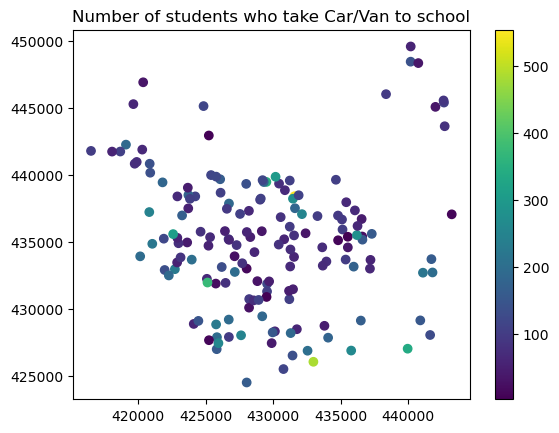

In [51]:
import matplotlib.pyplot as plt

plt.scatter(x=merged_df1["X"], y =merged_df1["Y"], c = merged_df1["Car/Van"]) # setting the axis and the points
plt.colorbar() # adding the color bar
plt.title("Number of students who take Car/Van to school") # adding a relevant title
plt.show # displaying

Here the schools have been colour coded to represent the number of students who take a Car or Van to school

In [52]:
#pip install geopandas

In [53]:
import geopandas as gpd

In [54]:
#pip install numba

In [55]:
LeedsBase = gpd.read_file("Leeds_MSOA.shp") #reading in a shapefile

<AxesSubplot: >

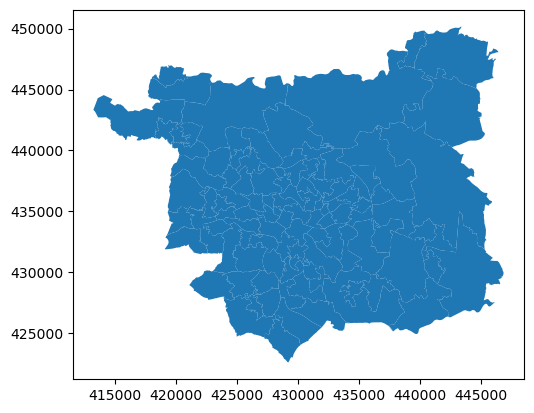

In [56]:
LeedsBase.plot() # plotting the shapefile

In [57]:
visual = gpd.GeoDataFrame(merged_df1, geometry = gpd.points_from_xy(merged_df1['X'], merged_df1['Y']))
# creating the geoframe using the X and Y coordinates

In [58]:
visual.head(3)

Bus (type not known)  Car Share  Car/Van  Cycle  Dedicated School Bus  \
1                     0          9       11      0                     0   
2                     0          0      140      6                     0   
5                     4          6      129      5                     6   

   Other  Public Bus Service  Taxi  Train  Walk  Grand Total  \
1      0                   0     0      0    66           86   
2      0                   4     0      0    78          228   
5      0                   2     0      0   244          396   

                                              School OpenOrClosed    Phase  \
1  Aberford Church of England Voluntary Controlle...         Open  Primary   
2                                Adel Primary School         Open  Primary   
5                    Allerton Bywater Primary School         Open  Primary   

                           TypeDetail ReligiousCharacter            Years  \
1  Local authority maintained schools  Church of England  Reception-Year6   
2  Local authority maintained schools     Does not apply    Nursery-Year6   
5                           Academies               None    Nursery-Year6   

  Postcode lsoa01     lsoa11           Ward_new        Constituency  \
1  LS253BU    NaN  E01011297           Harewood  Elmet and Rothwell   
2  LS168DY    NaN  E01011385  Adel & Wharfedale    Leeds North West   
5  WF102DR    NaN  E01011307   Kippax & Methley  Elmet and Rothwell   

  ClusterThisYear         X         Y                       geometry  
1        Garforth  443232.0  437054.0  POINT (443232.000 437054.000)  
2            ESNW  428005.0  439325.0  POINT (428005.000 439325.000)  
5        Brigshaw  441632.0  428057.0  POINT (441632.000 428057.000)

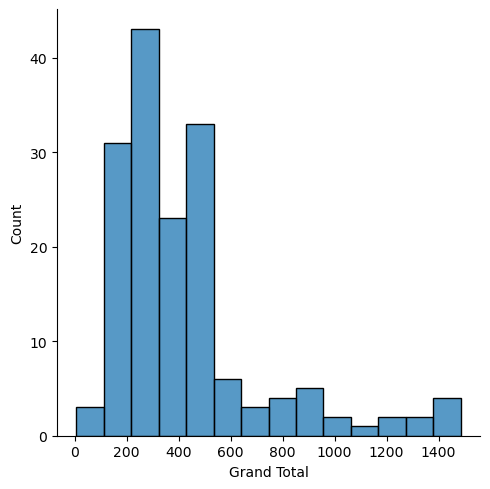

In [59]:
# The amount of pupils per school can now be visualised, which makes the point about most schools containing 200-500 pupils
# much more easier to visualise
sns.displot(data = visual, x = "Grand Total", bins = 14) # using 14 bins as there are there are up to 1400 students
# displayed in the displot, so each bar represents roughly 100 students

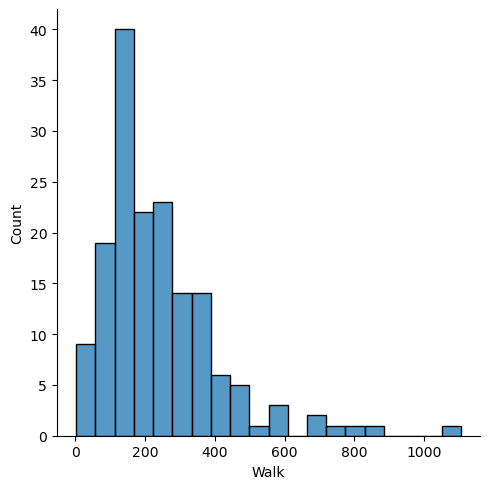

In [60]:
sns.displot(data = visual, x = "Walk", bins = 20) 

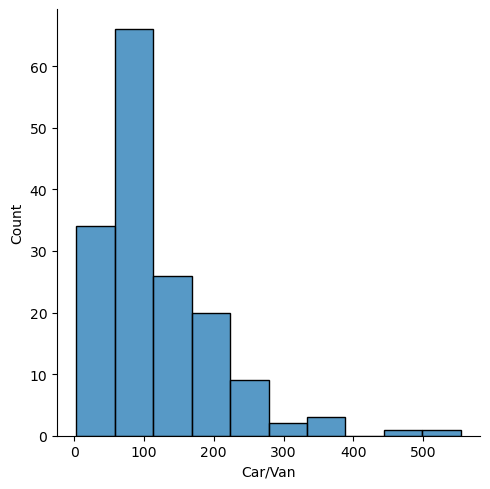

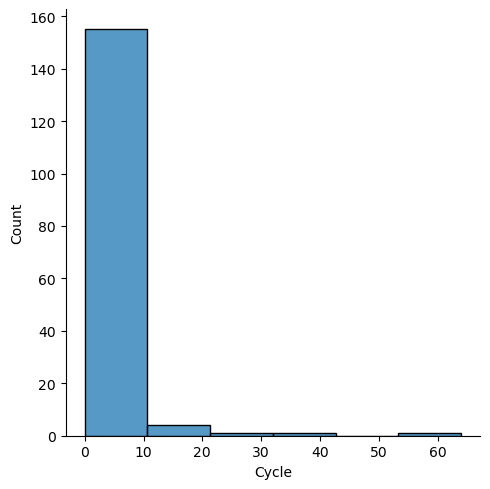

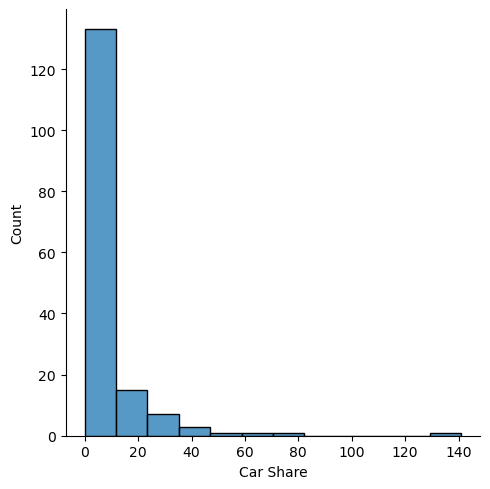

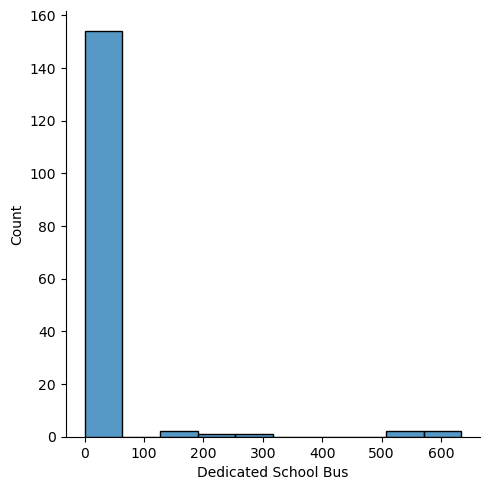

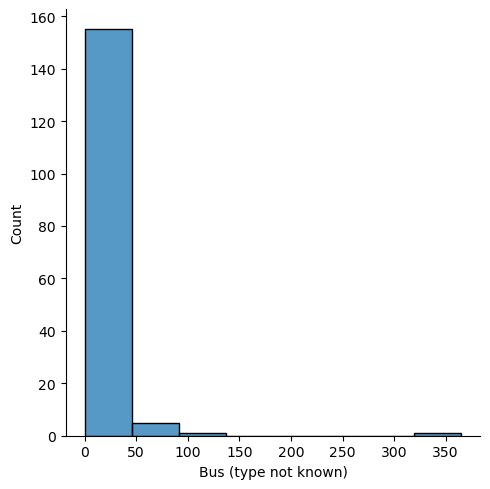

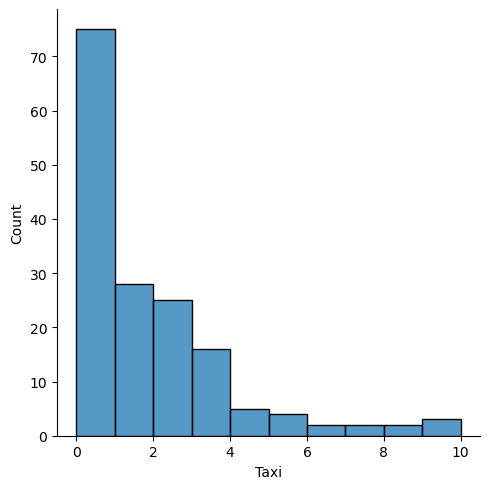

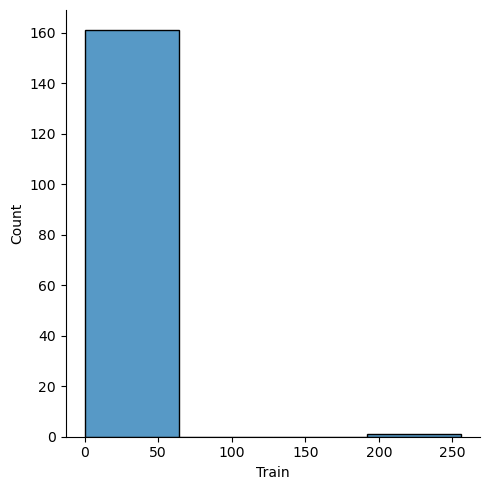

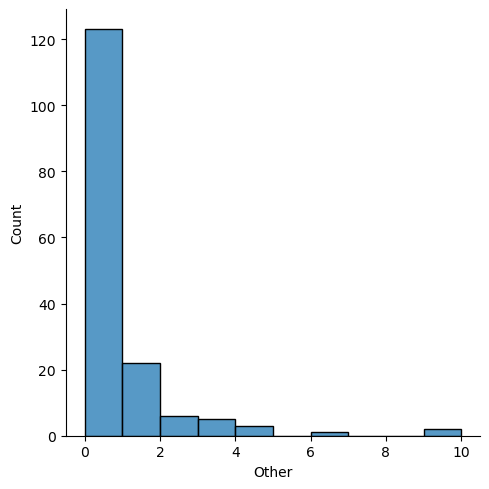

In [61]:
sns.displot(data = visual, x = "Car/Van", bins = 10) 
sns.displot(data = visual, x = "Cycle", bins = 6) 
sns.displot(data = visual, x = "Car Share", bins = 12) 
sns.displot(data = visual, x = "Dedicated School Bus", bins = 10) 
sns.displot(data = visual, x = "Bus (type not known)", bins = 8) 
sns.displot(data = visual, x = "Taxi", bins = 10) 
sns.displot(data = visual, x = "Train", bins = 4)
sns.displot(data = visual, x = "Other", bins = 10)

In [62]:
LeedsBase.crs # checking the coordinate reference system for the shape file LeedsBase

<Derived Projected CRS: EPSG:27700>
Name: OSGB36 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: Ordnance Survey of Great Britain 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [63]:
visual.crs # does not have an assigned crs

In [64]:
visual = visual.set_crs(LeedsBase.crs, inplace = True)

Text(0.5, 1.0, 'Schools in the visual dataset')

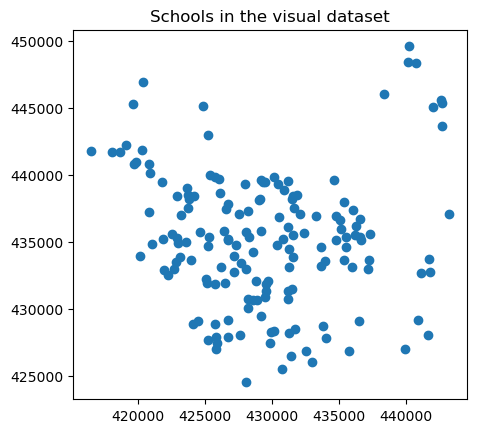

In [65]:
visual.plot() 
plt.title("Schools in the visual dataset")
#plots the location of each school in merged_df1
# This is a very basic plot, only showing the locations of schools relevant to their x and y coordinates, a basemap will 
# later be added.
# Additionally the schools will have varying values to each represent their number of students who take a specified method
# of transport to school

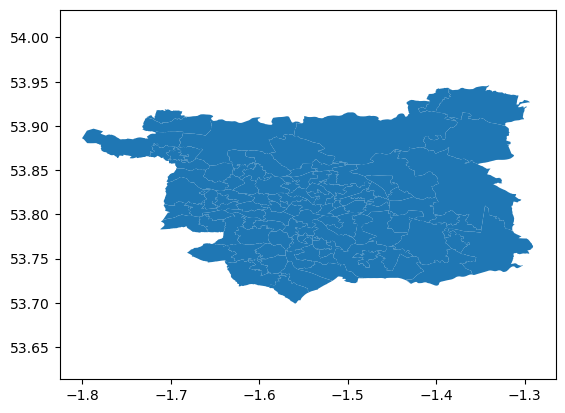

In [66]:
LeedsBase_2 = LeedsBase.to_crs(epsg = 4326) # assigning a new spatial df using crs 4326
LeedsBase_2.plot()
lims = plt.axis('equal')

<AxesSubplot: >

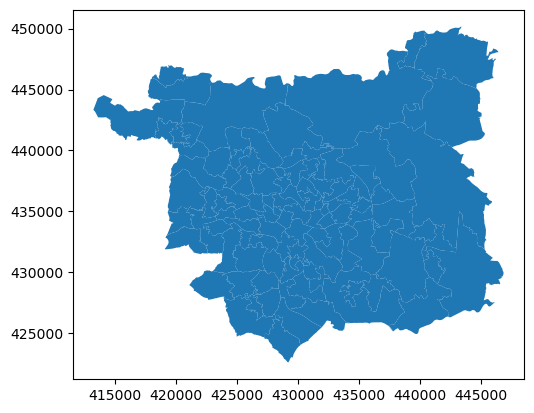

In [67]:
LeedsBase.plot()

In [68]:
LeedsBase_2.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [69]:
clipy = gpd.clip(visual, LeedsBase) # clipping visual df to LeedsBase df

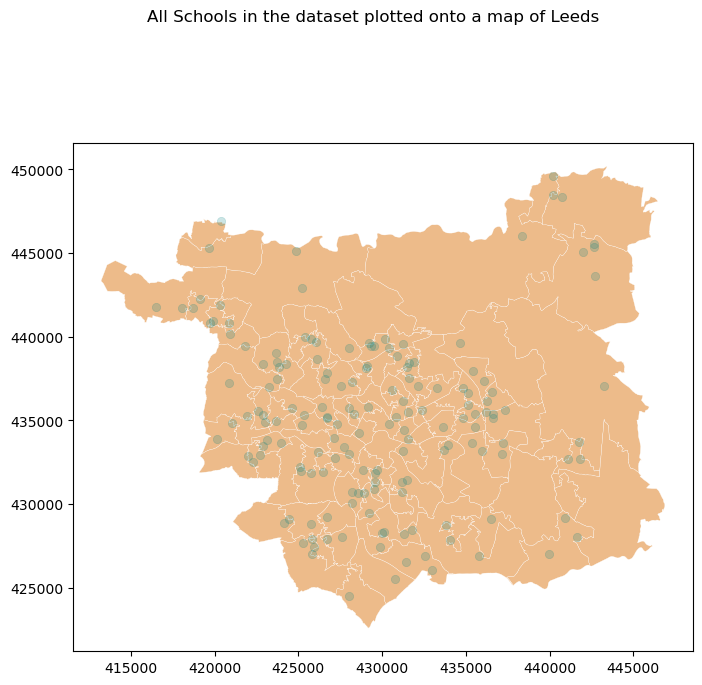

In [70]:
fig, ax = plt.subplots(1,1, figsize=(8,8), ) # making the figure size 8 by 8
LeedsBase.plot(ax = ax, facecolor = '#EDBB8A', edgecolor = 'white', linewidth = 0.2)
visual.plot(ax = ax, color = '#008080', linewidth = 0.5, alpha = 0.2) # plotting the schools
fig.suptitle('All Schools in the dataset plotted onto a map of Leeds')
plt.show()

Building on from the previous maps, this plot shows the schools in relation to their location within Leeds

In [71]:
LeedsBase.head(3)

OBJECTID   MSOA11CD   MSOA11NM   LONG     LAT Location  \
0      1716  E02002337  Leeds 008 -1.752  53.880    North   
1      1718  E02002339  Leeds 010 -1.692  53.868    North   
2      1719  E02002340  Leeds 011 -1.678  53.868    North   

                                            geometry  
0  POLYGON ((418310.512 440995.504, 418283.825 44...  
1  POLYGON ((420442.406 442436.687, 420443.313 44...  
2  POLYGON ((421248.688 442315.812, 421284.073 44...

C:\Users\leonp\AppData\Local\Temp\ipykernel_9800\2659377267.py:9: UserWarning: Legend does not support handles for PatchCollection instances.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#implementing-a-custom-legend-handler
  leg = ax.legend(); # Adding a legend


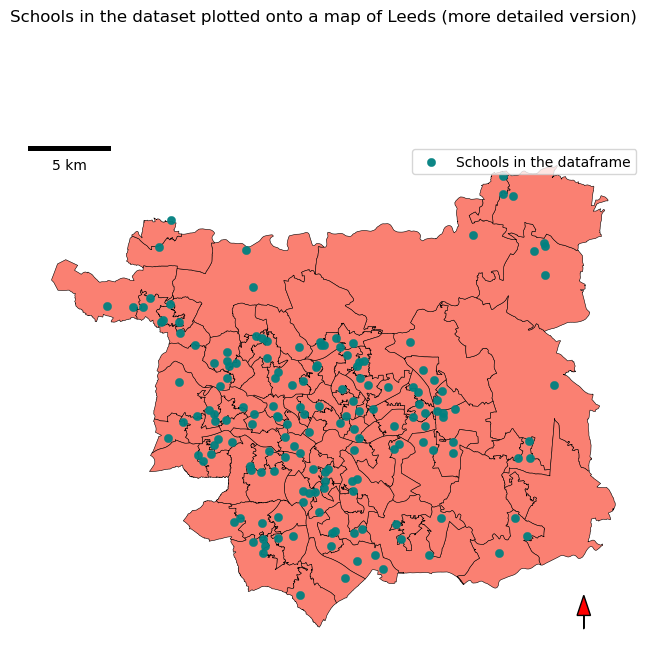

In [72]:
fig, ax = plt.subplots(1,1, figsize=(8,8),) #setting the figure size
lp = LeedsBase.plot(ax = ax, facecolor = 'salmon', edgecolor = 'black', linewidth = 0.4, label = 'MSOA') # Setting coloUrs
visual.plot(ax = ax, color = '#008080', linewidth = 0.3, alpha = 0.95, label = 'Schools in the dataframe') 
ax.set_axis_off() # Removing the X and Y coordinates from view
lp.arrow(445000, 422500, 0, 2000, head_width = 800, length_includes_head=True, facecolor='r') # Adding a North arrow
scale1 = ScaleBar(dx=1,location='upper left') # Adding a scale bar
ax.add_artist(scale1) #ploting the 5km scale bar
fig.suptitle('Schools in the dataset plotted onto a map of Leeds (more detailed version)') # Adding a title
leg = ax.legend(); # Adding a legend

A more detailed version schools in the dataframe visulised onto a map of Leeds

In [73]:
LeedsBase['Area'] = LeedsBase.area

In [74]:
LeedsBase.head(3)

OBJECTID   MSOA11CD   MSOA11NM   LONG     LAT Location  \
0      1716  E02002337  Leeds 008 -1.752  53.880    North   
1      1718  E02002339  Leeds 010 -1.692  53.868    North   
2      1719  E02002340  Leeds 011 -1.678  53.868    North   

                                            geometry          Area  
0  POLYGON ((418310.512 440995.504, 418283.825 44...  1.488289e+07  
1  POLYGON ((420442.406 442436.687, 420443.313 44...  1.413270e+06  
2  POLYGON ((421248.688 442315.812, 421284.073 44...  2.175963e+06

In [75]:
LeedsBase['Area'].describe()

count    1.070000e+02
mean     5.156302e+06
std      8.025611e+06
min      4.087021e+05
25%      1.692020e+06
50%      2.413909e+06
75%      4.652553e+06
max      5.207467e+07
Name: Area, dtype: float64

In [76]:
visual.head()

Bus (type not known)  Car Share  Car/Van  Cycle  Dedicated School Bus  \
1                     0          9       11      0                     0   
2                     0          0      140      6                     0   
5                     4          6      129      5                     6   
7                     0        141      554     10                    17   
8                    14          5      348     33                     0   

   Other  Public Bus Service  Taxi  Train  Walk  Grand Total  \
1      0                   0     0      0    66           86   
2      0                   4     0      0    78          228   
5      0                   2     0      0   244          396   
7      2                 348     8      0   405         1485   
8      4                  99     3      5   740         1251   

                                              School OpenOrClosed      Phase  \
1  Aberford Church of England Voluntary Controlle...         Open    Primary   
2                                Adel Primary School         Open    Primary   
5                    Allerton Bywater Primary School         Open    Primary   
7                             Allerton Grange School         Open  Secondary   
8                               Allerton High School         Open  Secondary   

                           TypeDetail ReligiousCharacter            Years  \
1  Local authority maintained schools  Church of England  Reception-Year6   
2  Local authority maintained schools     Does not apply    Nursery-Year6   
5                           Academies               None    Nursery-Year6   
7  Local authority maintained schools     Does not apply     Year7-Year13   
8  Local authority maintained schools     Does not apply     Year7-Year13   

  Postcode lsoa01     lsoa11           Ward_new        Constituency  \
1  LS253BU    NaN  E01011297           Harewood  Elmet and Rothwell   
2  LS168DY    NaN  E01011385  Adel & Wharfedale    Leeds North West   
5  WF102DR    NaN  E01011307   Kippax & Methley  Elmet and Rothwell   
7  LS176SF    NaN  E01011511           Roundhay    Leeds North East   
8  LS177AG    NaN  E01011559          Alwoodley    Leeds North East   

  ClusterThisYear         X         Y                       geometry  
1        Garforth  443232.0  437054.0  POINT (443232.000 437054.000)  
2            ESNW  428005.0  439325.0  POINT (428005.000 439325.000)  
5        Brigshaw  441632.0  428057.0  POINT (441632.000 428057.000)  
7             ARM  431591.0  438408.0  POINT (431591.000 438408.000)  
8             ARM  429500.0  439471.0  POINT (429500.000 439471.000)

In [77]:
SUB_SUB = visual[['lsoa11', "School"]] # Creating a new sub with lsoa11 location code and school names

In [78]:
visual2 = LeedsBase.join(SUB_SUB.set_index('lsoa11'), on = "MSOA11CD") # joining the sub

In [79]:
visual2 # checking it has worked

OBJECTID   MSOA11CD   MSOA11NM   LONG     LAT Location  \
0        1716  E02002337  Leeds 008 -1.752  53.880    North   
1        1718  E02002339  Leeds 010 -1.692  53.868    North   
2        1719  E02002340  Leeds 011 -1.678  53.868    North   
3        2527  E02002336  Leeds 007 -1.639  53.883    North   
4        1717  E02002338  Leeds 009 -1.709  53.870    North   
5        2524  E02002333  Leeds 004 -1.693  53.901    North   
6        1722  E02002343  Leeds 014 -1.676  53.856     West   
7        1734  E02002356  Leeds 027 -1.669  53.841     West   
8        1750  E02002374  Leeds 045 -1.601  53.818     West   
9        1751  E02002375  Leeds 046 -1.622  53.820     West   
10       2532  E02002385  Leeds 056 -1.586  53.809  Central   
11       2535  E02002388  Leeds 059 -1.612  53.809     West   
12       2543  E02002396  Leeds 067 -1.606  53.800     West   
13       2547  E02002400  Leeds 071 -1.578  53.798  Central   
14       2534  E02002387  Leeds 058 -1.635  53.809     West   
15       2544  E02002397  Leeds 068 -1.643  53.799     West   
16       2556  E02002409  Leeds 080 -1.633  53.781     West   
17       2554  E02002407  Leeds 078 -1.613  53.790     West   
18       2557  E02002410  Leeds 081 -1.581  53.787     West   
19       1730  E02002351  Leeds 022 -1.456  53.845     East   
20       1737  E02002359  Leeds 030 -1.376  53.832     East   
21       2533  E02002386  Leeds 057 -1.427  53.805     East   
22       2550  E02002403  Leeds 074 -1.388  53.796     East   
23       2553  E02002406  Leeds 077 -1.370  53.790     East   
24       2562  E02002416  Leeds 087 -1.416  53.768    South   
25       2563  E02002417  Leeds 088 -1.342  53.771    South   
26       2564  E02002418  Leeds 089 -1.376  53.767    South   
27       2578  E02002432  Leeds 103 -1.393  53.740    South   
28       2525  E02002334  Leeds 005 -1.363  53.884    North   
29       2526  E02002335  Leeds 006 -1.475  53.893    North   
30       1736  E02002358  Leeds 029 -1.461  53.837     East   
31       2560  E02002414  Leeds 085 -1.547  53.782  Central   
32       2561  E02002415  Leeds 086 -1.548  53.776  Central   
33       2566  E02002420  Leeds 091 -1.554  53.764  Central   
34       6767  E02006876  Leeds 112 -1.519  53.776  Central   
35       2558  E02002411  Leeds 082 -1.560  53.785  Central   
36       2565  E02002419  Leeds 090 -1.575  53.774     West   
37       2559  E02002412  Leeds 083 -1.608  53.777     West   
38       2568  E02002422  Leeds 093 -1.586  53.758    South   
39       2576  E02002430  Leeds 101 -1.553  53.744    South   
40       2567  E02002421  Leeds 092 -1.529  53.767  Central   
41       2574  E02002428  Leeds 099 -1.535  53.754    South   
42       1755  E02002380  Leeds 051 -1.636  53.816     West   
43       1740  E02002362  Leeds 033 -1.614  53.833     West   
44       1735  E02002357  Leeds 028 -1.629  53.836     West   
45       2528  E02002381  Leeds 052 -1.657  53.816     West   
46       1745  E02002368  Leeds 039 -1.681  53.827     West   
47       2538  E02002391  Leeds 062 -1.666  53.805     West   
48       2540  E02002393  Leeds 064 -1.525  53.805  Central   
49       2541  E02002394  Leeds 065 -1.510  53.804  Central   
50       2551  E02002404  Leeds 075 -1.519  53.791  Central   
51       1746  E02002369  Leeds 040 -1.482  53.821  Central   
52       1752  E02002376  Leeds 047 -1.501  53.815  Central   
53       1754  E02002379  Leeds 050 -1.466  53.814  Central   
54       2536  E02002389  Leeds 060 -1.492  53.809  Central   
55       2537  E02002390  Leeds 061 -1.467  53.806  Central   
56       2529  E02002382  Leeds 053 -1.512  53.812  Central   
57       2546  E02002399  Leeds 070 -1.505  53.783  Central   
58       2545  E02002398  Leeds 069 -1.458  53.784  Central   
59       2548  E02002401  Leeds 072 -1.483  53.774  Central   
60       1731  E02002352  Leeds 023 -1.531  53.843  Central   
61       1733  E02002354  Leeds 025 -1.550  53.837  Central   
62       1741  E02002363  Leeds 034 

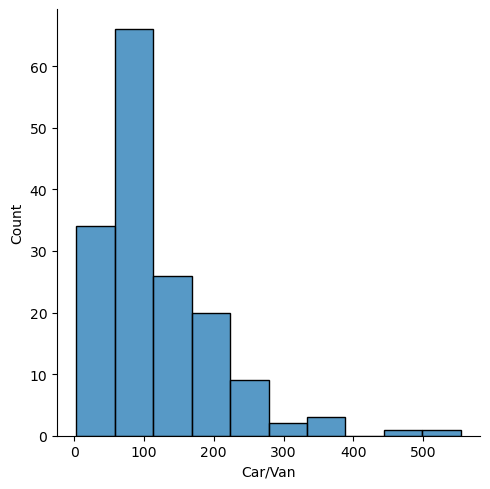

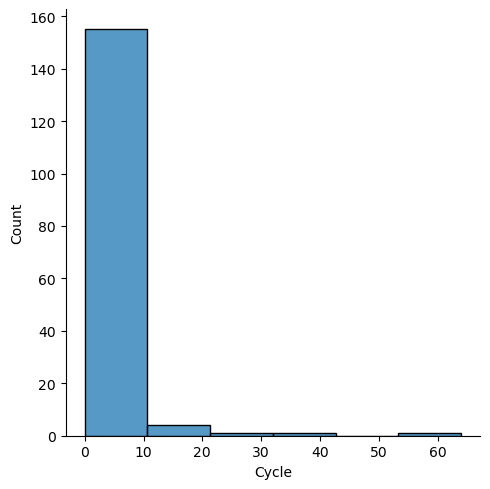

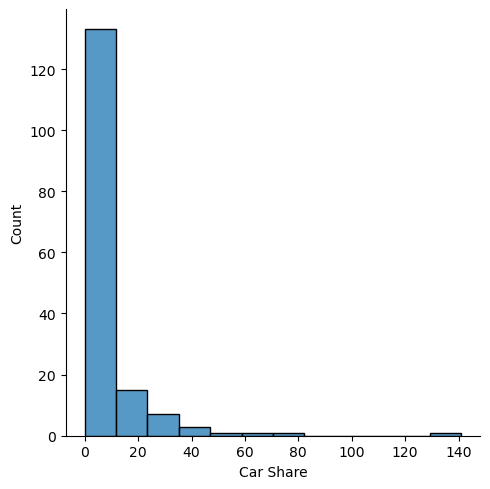

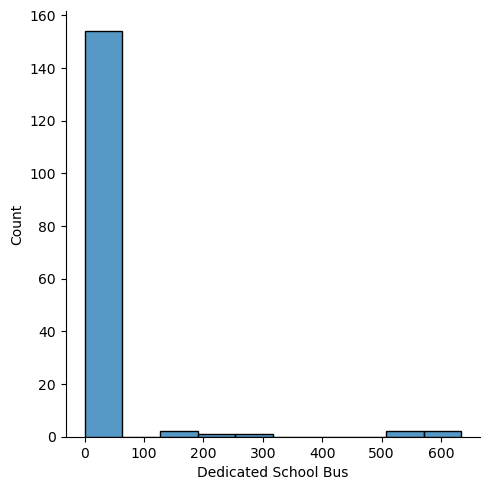

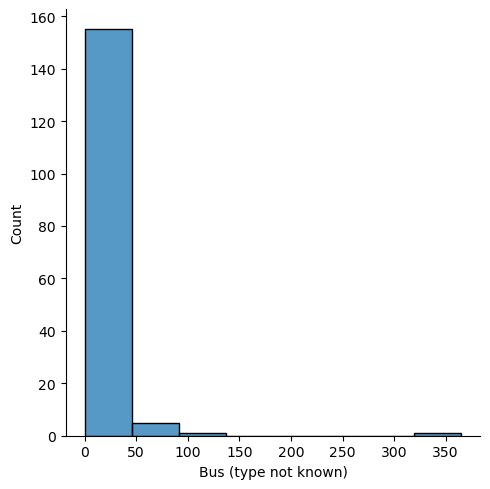

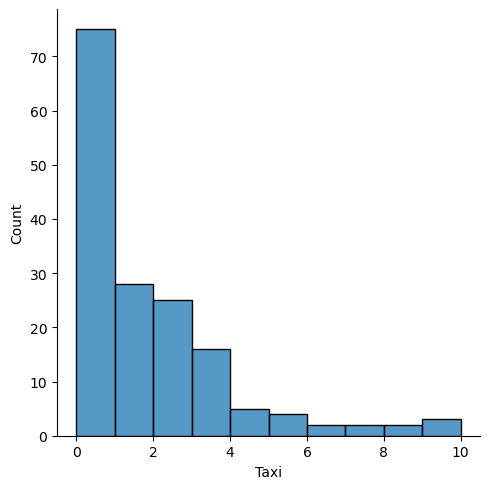

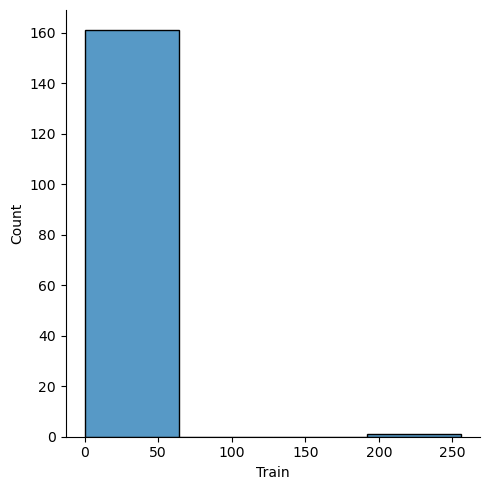

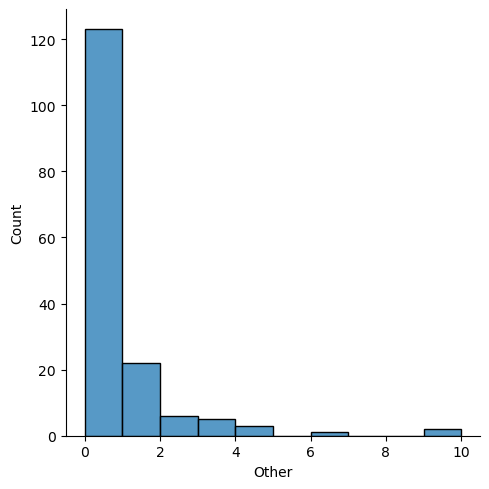

In [80]:
sns.displot(data = visual, x = "Car/Van", bins = 10) 
sns.displot(data = visual, x = "Cycle", bins = 6) 
sns.displot(data = visual, x = "Car Share", bins = 12) 
sns.displot(data = visual, x = "Dedicated School Bus", bins = 10) 
sns.displot(data = visual, x = "Bus (type not known)", bins = 8) 
sns.displot(data = visual, x = "Taxi", bins = 10) 
sns.displot(data = visual, x = "Train", bins = 4)
sns.displot(data = visual, x = "Other", bins = 10)

# These displots show the distributions of all the different modes of transport taken to all schools 

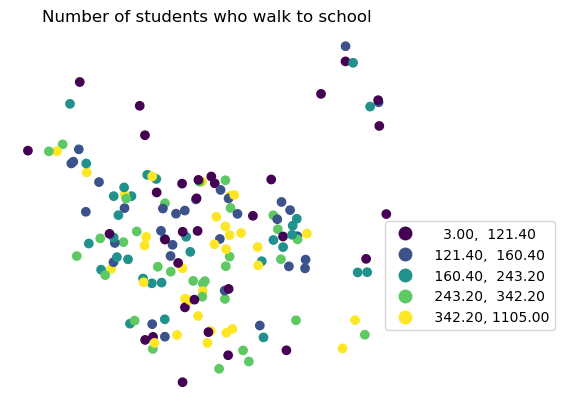

In [81]:
fig, ax = plt.subplots(1) #create the figure
visual.plot(ax = ax,column = 'Walk', scheme = 'quantiles', k = 5,legend = True) # setting styling
# ^ add the plot, colouring by number of bus stops, divided into 5 quantiles
plt.title('Number of students who walk to school') #add a title
leg = ax.get_legend() #add the legend
leg.set_bbox_to_anchor((1.4,0.5)) #set the position of the legend- you can change these numbers to see how it works
ax.set_axis_off() #remove the axes
plt.show() #show the plot

In [82]:
import matplotlib.pyplot as plt 
 # importing matplotlib to create scatter plots, bar plots and histograms

In [83]:
gdf = gpd.read_file("Leeds_MSOA.shp") # reading the shape file so have to use gpd for geopandas
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   OBJECTID  107 non-null    int64   
 1   MSOA11CD  107 non-null    object  
 2   MSOA11NM  107 non-null    object  
 3   LONG      107 non-null    float64 
 4   LAT       107 non-null    float64 
 5   Location  107 non-null    object  
 6   geometry  107 non-null    geometry
dtypes: float64(2), geometry(1), int64(1), object(3)
memory usage: 6.0+ KB


<AxesSubplot: >

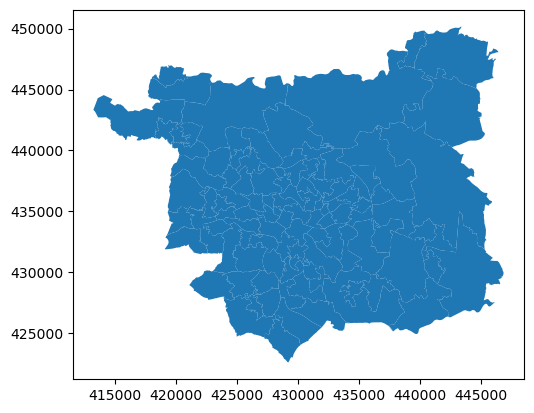

In [84]:
gdf.plot() # plotting the shapefile

 ### Creating choropleths

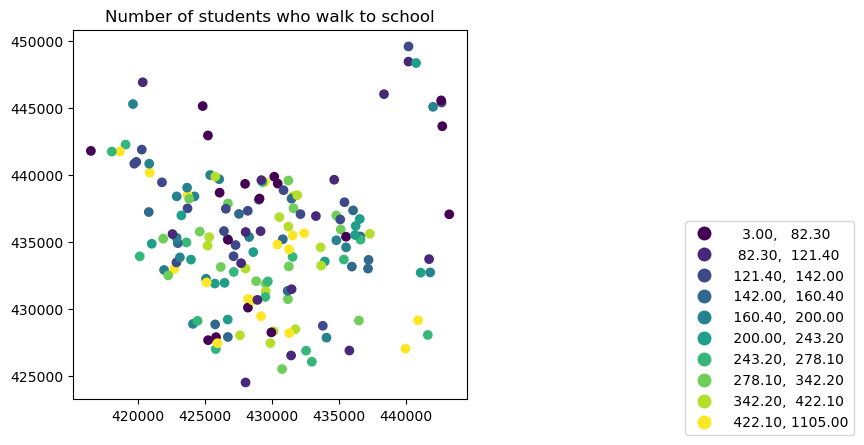

In [85]:
fig, ax = plt.subplots(1) # creating figure
visual.plot(ax = ax, column = "Walk", scheme = 'quantiles', k = 10, legend = True) # Creating the visual plot using
# the column name "Walk", a scheme of quantiles to equally distribute the values, k of 10 to have no ocpacity. 
plt.title("Number of students who walk to school") # Adding a title
leg = ax.get_legend() # Adding the legend
leg.set_bbox_to_anchor((2,0.5)) # Alligning the legend
plt.show() # To display the choropleth map

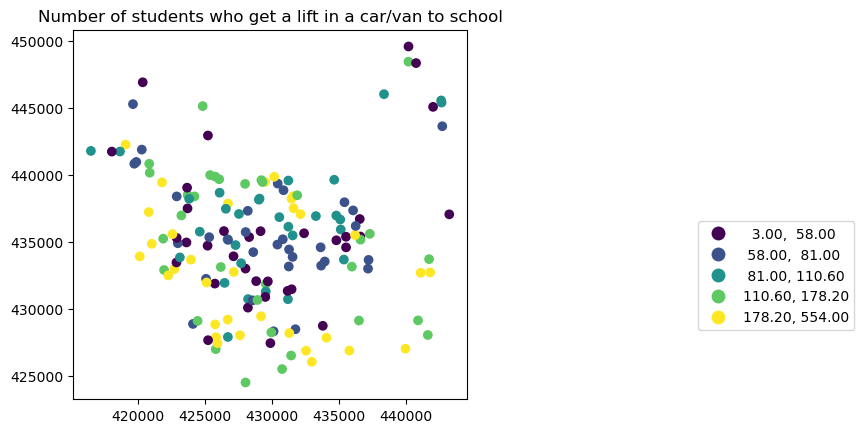

In [86]:
fig, ax = plt.subplots(1) # creating figure
visual.plot(ax = ax, column = "Car/Van", scheme = 'quantiles', legend = True)
plt.title("Number of students who get a lift in a car/van to school")
leg = ax.get_legend()
leg.set_bbox_to_anchor((2,0.5))
plt.show()

C:\Users\leonp\anaconda3\envs\geo_env\Lib\site-packages\mapclassify\classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
C:\Users\leonp\anaconda3\envs\geo_env\Lib\site-packages\mapclassify\classifiers.py:241: UserWarning: Warning: setting k to 4
  Warn("Warning: setting k to %d" % k_q, UserWarning)


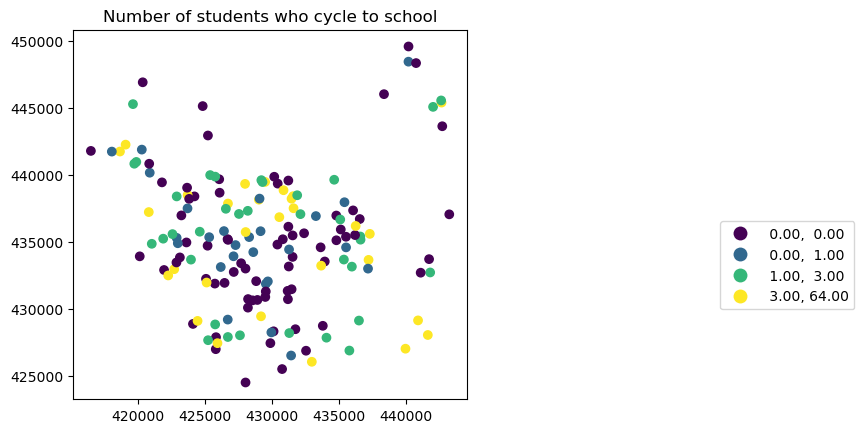

In [87]:
fig, ax = plt.subplots(1) # creating figure
visual.plot(ax = ax, column = "Cycle", scheme = 'quantiles', legend = True)
plt.title("Number of students who cycle to school")
leg = ax.get_legend()
leg.set_bbox_to_anchor((2,0.5))
plt.show()

Choropleths have been created, however they are lacking visualisation in the form of a base map to plot their relativity to Leeds.
Below shows all the schools in the df plotted onto a map of Leeds.

OBJECTID   MSOA11CD   MSOA11NM   LONG     LAT Location  \
0        1716  E02002337  Leeds 008 -1.752  53.880    North   
1        1718  E02002339  Leeds 010 -1.692  53.868    North   
2        1719  E02002340  Leeds 011 -1.678  53.868    North   
3        2527  E02002336  Leeds 007 -1.639  53.883    North   
4        1717  E02002338  Leeds 009 -1.709  53.870    North   
5        2524  E02002333  Leeds 004 -1.693  53.901    North   
6        1722  E02002343  Leeds 014 -1.676  53.856     West   
7        1734  E02002356  Leeds 027 -1.669  53.841     West   
8        1750  E02002374  Leeds 045 -1.601  53.818     West   
9        1751  E02002375  Leeds 046 -1.622  53.820     West   
10       2532  E02002385  Leeds 056 -1.586  53.809  Central   
11       2535  E02002388  Leeds 059 -1.612  53.809     West   
12       2543  E02002396  Leeds 067 -1.606  53.800     West   
13       2547  E02002400  Leeds 071 -1.578  53.798  Central   
14       2534  E02002387  Leeds 058 -1.635  53.809     West   
15       2544  E02002397  Leeds 068 -1.643  53.799     West   
16       2556  E02002409  Leeds 080 -1.633  53.781     West   
17       2554  E02002407  Leeds 078 -1.613  53.790     West   
18       2557  E02002410  Leeds 081 -1.581  53.787     West   
19       1730  E02002351  Leeds 022 -1.456  53.845     East   
20       1737  E02002359  Leeds 030 -1.376  53.832     East   
21       2533  E02002386  Leeds 057 -1.427  53.805     East   
22       2550  E02002403  Leeds 074 -1.388  53.796     East   
23       2553  E02002406  Leeds 077 -1.370  53.790     East   
24       2562  E02002416  Leeds 087 -1.416  53.768    South   
25       2563  E02002417  Leeds 088 -1.342  53.771    South   
26       2564  E02002418  Leeds 089 -1.376  53.767    South   
27       2578  E02002432  Leeds 103 -1.393  53.740    South   
28       2525  E02002334  Leeds 005 -1.363  53.884    North   
29       2526  E02002335  Leeds 006 -1.475  53.893    North   
30       1736  E02002358  Leeds 029 -1.461  53.837     East   
31       2560  E02002414  Leeds 085 -1.547  53.782  Central   
32       2561  E02002415  Leeds 086 -1.548  53.776  Central   
33       2566  E02002420  Leeds 091 -1.554  53.764  Central   
34       6767  E02006876  Leeds 112 -1.519  53.776  Central   
35       2558  E02002411  Leeds 082 -1.560  53.785  Central   
36       2565  E02002419  Leeds 090 -1.575  53.774     West   
37       2559  E02002412  Leeds 083 -1.608  53.777     West   
38       2568  E02002422  Leeds 093 -1.586  53.758    South   
39       2576  E02002430  Leeds 101 -1.553  53.744    South   
40       2567  E02002421  Leeds 092 -1.529  53.767  Central   
41       2574  E02002428  Leeds 099 -1.535  53.754    South   
42       1755  E02002380  Leeds 051 -1.636  53.816     West   
43       1740  E02002362  Leeds 033 -1.614  53.833     West   
44       1735  E02002357  Leeds 028 -1.629  53.836     West   
45       2528  E02002381  Leeds 052 -1.657  53.816     West   
46       1745  E02002368  Leeds 039 -1.681  53.827     West   
47       2538  E02002391  Leeds 062 -1.666  53.805     West   
48       2540  E02002393  Leeds 064 -1.525  53.805  Central   
49       2541  E02002394  Leeds 065 -1.510  53.804  Central   
50       2551  E02002404  Leeds 075 -1.519  53.791  Central   
51       1746  E02002369  Leeds 040 -1.482  53.821  Central   
52       1752  E02002376  Leeds 047 -1.501  53.815  Central   
53       1754  E02002379  Leeds 050 -1.466  53.814  Central   
54       2536  E02002389  Leeds 060 -1.492  53.809  Central   
55       2537  E02002390  Leeds 061 -1.467  53.806  Central   
56       2529  E02002382  Leeds 053 -1.512  53.812  Central   
57       2546  E02002399  Leeds 070 -1.505  53.783  Central   
58       2545  E02002398  Leeds 069 -1.458  53.784  Central   
59       2548  E02002401  Leeds 072 -1.483  53.774  Central   
60       1731  E02002352  Leeds 023 -1.531  53.843  Central   
61       1733  E02002354  Leeds 025 -1.550  53.837  Central   
62       1741  E02002363  Leeds 034 

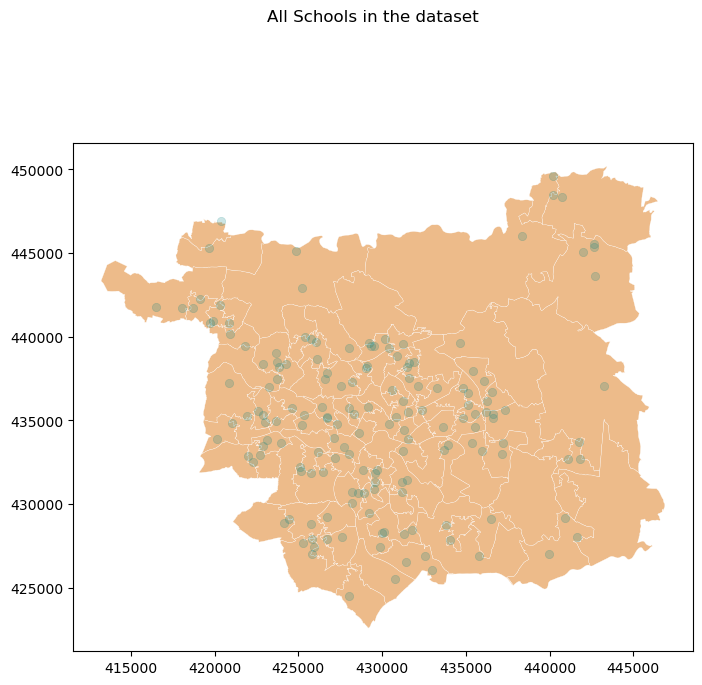

In [88]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
LeedsBase.plot(ax=ax, facecolor='#EDBB8A', edgecolor='white', linewidth=0.2)
visual.plot(ax=ax, color='#008080', linewidth=0.5, alpha=0.2)
fig.suptitle('All Schools in the dataset')
LeedsBase

Plotting transport by religious status of the school

In [89]:
LOCATION_DF["ReligiousCharacter"].value_counts()

Does not apply       178
Church of England     41
None                  35
Roman Catholic        31
Jewish                 2
No Info                2
Name: ReligiousCharacter, dtype: int64

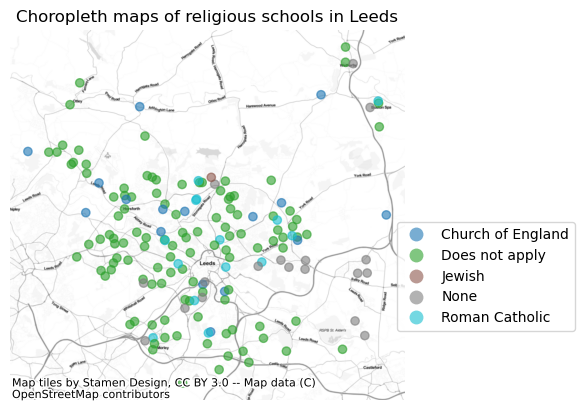

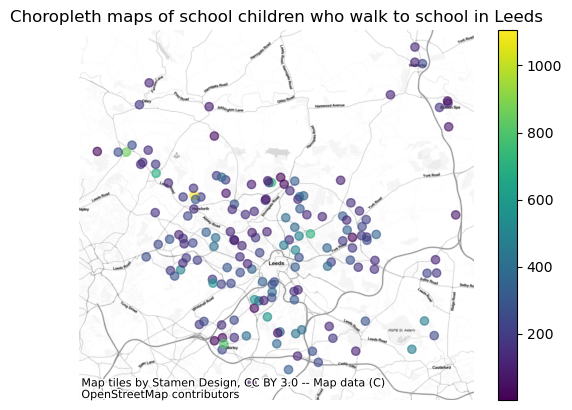

In [90]:
fig, ax = plt.subplots(1)
visual.plot(ax = ax, column = 'ReligiousCharacter',  legend = True, alpha = 0.6)
cx.add_basemap(ax, crs = visual.crs, source=cx.providers.Stamen.TonerLite)
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.45,0.5))
ax.set_axis_off()
ax.set_title("Choropleth maps of religious schools in Leeds")
plt.show()

fig, ax = plt.subplots(1)
visual.plot(ax = ax, column =  "Walk",  legend = True, alpha = 0.6)
cx.add_basemap(ax, crs = visual.crs, source=cx.providers.Stamen.TonerLite)
leg = ax.get_legend()
ax.set_axis_off()
ax.set_title("Choropleth maps of school children who walk to school in Leeds")
plt.show()

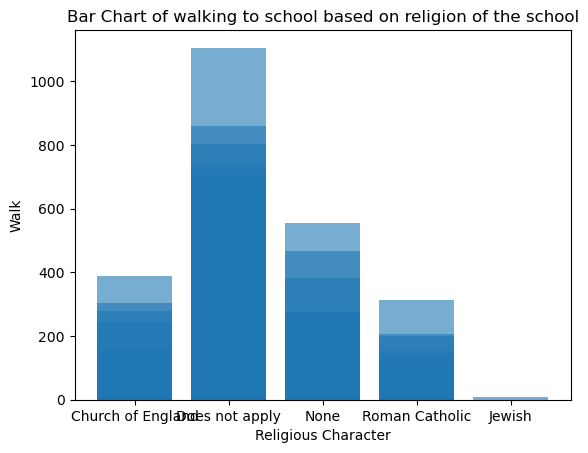

In [91]:
plt.bar(visual["ReligiousCharacter"], visual["Walk"], alpha=0.6)
plt.xlabel("Religious Character")
plt.ylabel("Walk")
plt.title("Bar Chart of walking to school based on religion of the school")
plt.show()

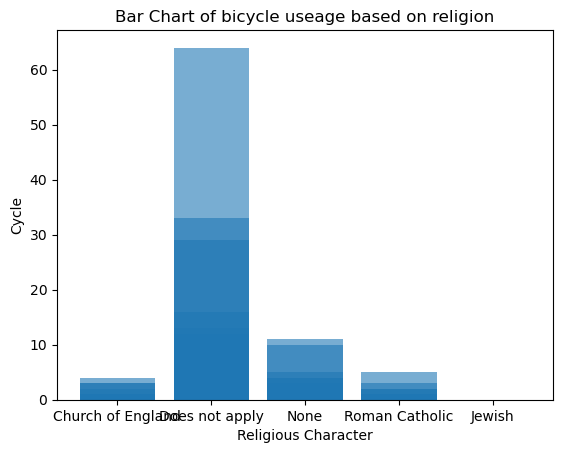

In [92]:
plt.bar(visual["ReligiousCharacter"], visual["Cycle"], alpha=0.6)
plt.xlabel("Religious Character")
plt.ylabel("Cycle")
plt.title("Bar Chart of bicycle useage based on religion")
plt.show()

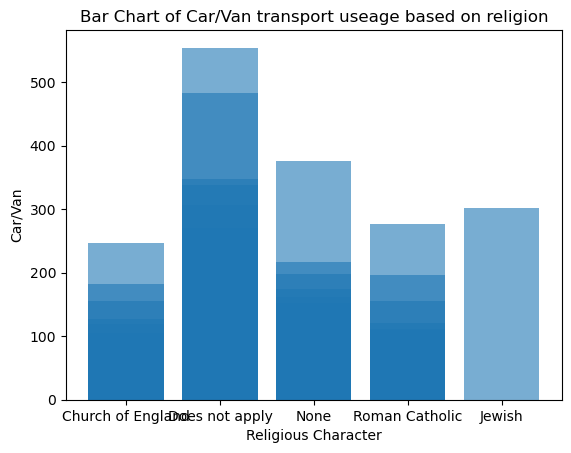

In [93]:
plt.bar(visual["ReligiousCharacter"], visual["Car/Van"], alpha=0.6)
plt.xlabel("Religious Character")
plt.ylabel("Car/Van")
plt.title("Bar Chart of Car/Van transport useage based on religion")
plt.show()

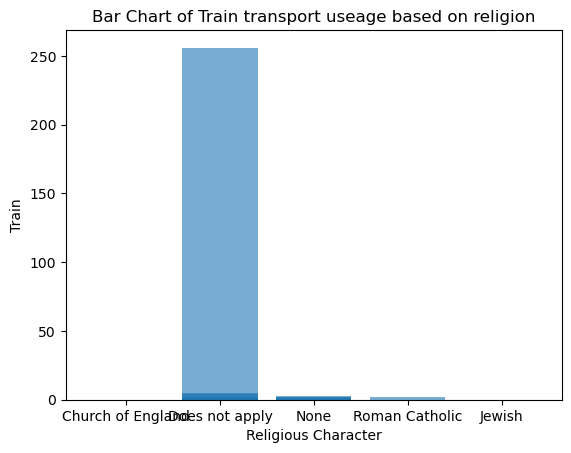

In [94]:
plt.bar(visual["ReligiousCharacter"], visual["Train"], alpha=0.6)
plt.xlabel("Religious Character")
plt.ylabel("Train")
plt.title("Bar Chart of Train transport useage based on religion")
plt.show()

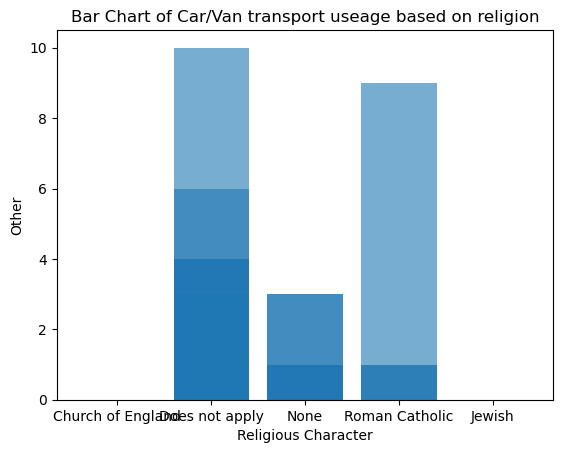

In [95]:
plt.bar(visual["ReligiousCharacter"], visual["Other"], alpha=0.6)
plt.xlabel("Religious Character")
plt.ylabel("Other")
plt.title("Bar Chart of Car/Van transport useage based on religion")
plt.show()

### Geographic Regression

In [96]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import folium

In [97]:
LR_model = LinearRegression()
LR_model.fit(visual[["X","Y"]], visual["Cycle"])

LinearRegression()

In [98]:
y_pred = LR_model.predict(visual[["X", "Y"]])

In [99]:
mse = mean_squared_error(visual["Cycle"], y_pred)
r2 = r2_score(visual["Cycle"], y_pred)

In [100]:
final_merge = pd.merge(LeedsBase, visual, left_on='MSOA11CD', right_on='lsoa01')

In [101]:
final_merge.head(3)

Empty GeoDataFrame
Columns: [OBJECTID, MSOA11CD, MSOA11NM, LONG, LAT, Location, geometry_x, Area, Bus (type not known), Car Share, Car/Van, Cycle, Dedicated School Bus, Other, Public Bus Service, Taxi, Train, Walk, Grand Total, School, OpenOrClosed, Phase, TypeDetail, ReligiousCharacter, Years, Postcode, lsoa01, lsoa11, Ward_new, Constituency, ClusterThisYear, X, Y, geometry_y]
Index: []

In [102]:
LeedsBase.head(3)

OBJECTID   MSOA11CD   MSOA11NM   LONG     LAT Location  \
0      1716  E02002337  Leeds 008 -1.752  53.880    North   
1      1718  E02002339  Leeds 010 -1.692  53.868    North   
2      1719  E02002340  Leeds 011 -1.678  53.868    North   

                                            geometry          Area  
0  POLYGON ((418310.512 440995.504, 418283.825 44...  1.488289e+07  
1  POLYGON ((420442.406 442436.687, 420443.313 44...  1.413270e+06  
2  POLYGON ((421248.688 442315.812, 421284.073 44...  2.175963e+06

In [103]:
visual.head(3)

Bus (type not known)  Car Share  Car/Van  Cycle  Dedicated School Bus  \
1                     0          9       11      0                     0   
2                     0          0      140      6                     0   
5                     4          6      129      5                     6   

   Other  Public Bus Service  Taxi  Train  Walk  Grand Total  \
1      0                   0     0      0    66           86   
2      0                   4     0      0    78          228   
5      0                   2     0      0   244          396   

                                              School OpenOrClosed    Phase  \
1  Aberford Church of England Voluntary Controlle...         Open  Primary   
2                                Adel Primary School         Open  Primary   
5                    Allerton Bywater Primary School         Open  Primary   

                           TypeDetail ReligiousCharacter            Years  \
1  Local authority maintained schools  Church of England  Reception-Year6   
2  Local authority maintained schools     Does not apply    Nursery-Year6   
5                           Academies               None    Nursery-Year6   

  Postcode lsoa01     lsoa11           Ward_new        Constituency  \
1  LS253BU    NaN  E01011297           Harewood  Elmet and Rothwell   
2  LS168DY    NaN  E01011385  Adel & Wharfedale    Leeds North West   
5  WF102DR    NaN  E01011307   Kippax & Methley  Elmet and Rothwell   

  ClusterThisYear         X         Y                       geometry  
1        Garforth  443232.0  437054.0  POINT (443232.000 437054.000)  
2            ESNW  428005.0  439325.0  POINT (428005.000 439325.000)  
5        Brigshaw  441632.0  428057.0  POINT (441632.000 428057.000)

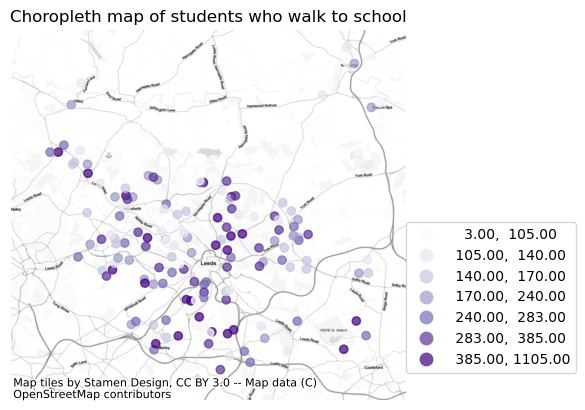

In [104]:
fig, ax = plt.subplots(1) # axis = plot 1 subplot using matplotlib libary 
visual.plot(ax = ax,column = 'Walk', scheme = 'quantiles', cmap = 'Purples', k = 7,legend = True, alpha = 0.7)
# The code above plots the "Walk" column into quantiles (equally spaces intervals), k specifies how many intervals there
# are, legend = True assigns a legend and alpha adjusts the opacity of the dots
cx.add_basemap(ax, crs = visual.crs, source=cx.providers.Stamen.TonerLite) # Adds a basemap to the choropleth map
leg = ax.get_legend() # Alligns and assigns the legend
leg.set_bbox_to_anchor((1.45,0.5)) # Alligns the legend
ax.set_axis_off()# Removes the axes
ax.set_title("Choropleth map of students who walk to school") # Sets a title
plt.show() # Displays the map

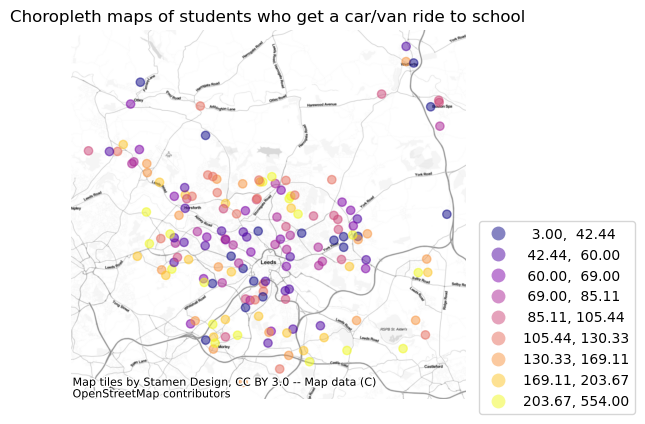

In [105]:
fig, ax = plt.subplots(1)
visual.plot(ax = ax,column = 'Car/Van', scheme = 'quantiles', cmap = 'plasma', k = 9,legend = True, alpha = 0.5)
cx.add_basemap(ax, crs = visual.crs, source=cx.providers.Stamen.TonerLite)
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.45,0.5))
ax.set_axis_off()
ax.set_title("Choropleth maps of students who get a car/van ride to school")
plt.show()
# Plasma colour pallet has been used as there is large discrepency between the values

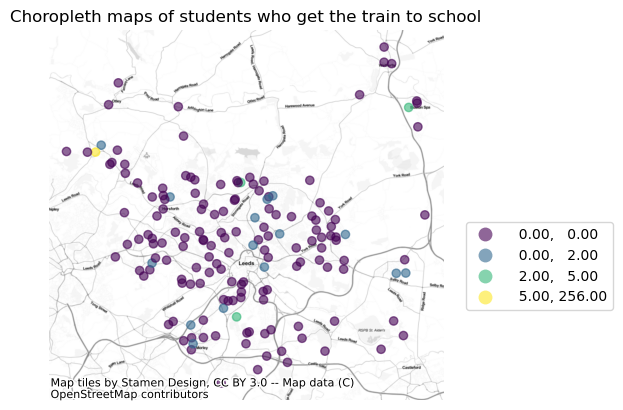

In [106]:
fig, ax = plt.subplots(1)
visual.plot(ax = ax,column = 'Train', scheme = 'fisher_jenks', cmap = 'viridis', k = 4,legend = True, alpha = 0.6)
cx.add_basemap(ax, crs = visual.crs, source=cx.providers.Stamen.TonerLite)
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.45,0.5))
ax.set_axis_off()
ax.set_title("Choropleth maps of students who get the train to school")
plt.show()
# using fisher_jenks to divide the values into natural breaks and the k number has been lowered to represent fewer
# intervals for the data

In [107]:
visual.head(1)

Bus (type not known)  Car Share  Car/Van  Cycle  Dedicated School Bus  \
1                     0          9       11      0                     0   

   Other  Public Bus Service  Taxi  Train  Walk  Grand Total  \
1      0                   0     0      0    66           86   

                                              School OpenOrClosed    Phase  \
1  Aberford Church of England Voluntary Controlle...         Open  Primary   

                           TypeDetail ReligiousCharacter            Years  \
1  Local authority maintained schools  Church of England  Reception-Year6   

  Postcode lsoa01     lsoa11  Ward_new        Constituency ClusterThisYear  \
1  LS253BU    NaN  E01011297  Harewood  Elmet and Rothwell        Garforth   

          X         Y                       geometry  
1  443232.0  437054.0  POINT (443232.000 437054.000)

In [108]:
w_queen = weights.Queen.from_dataframe(LeedsBase, idVariable = 'MSOA11CD')

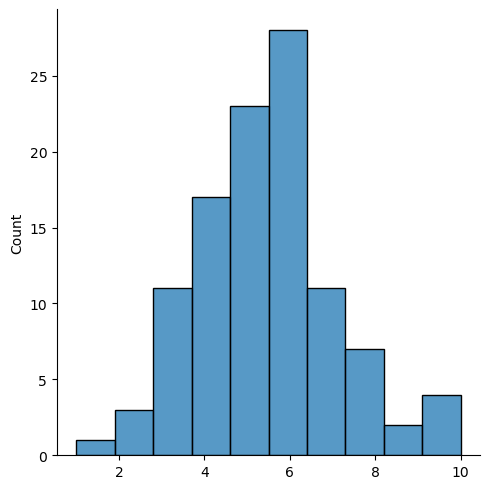

In [109]:
queen_card = pd.Series(w_queen.cardinalities)
sns.displot(queen_card, bins = 10)

 ## Data Analysis

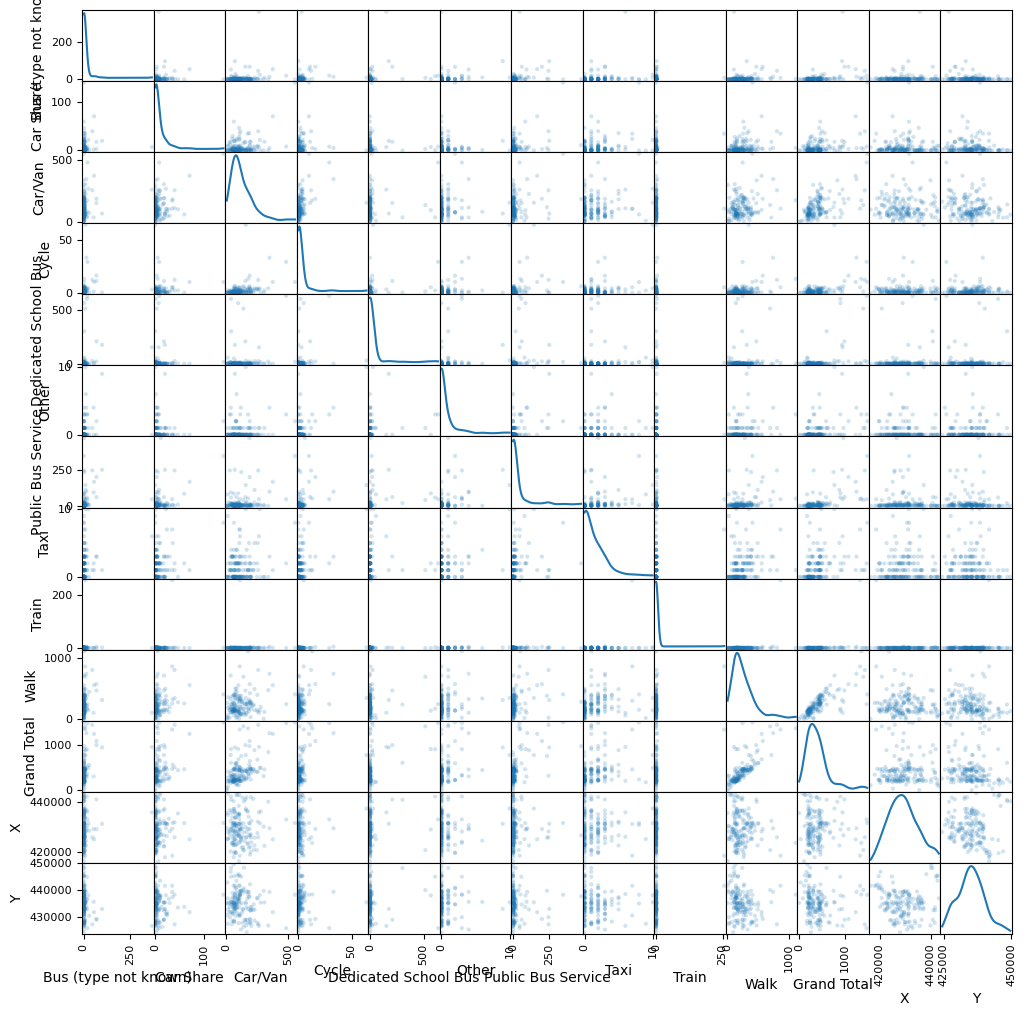

In [110]:
output = pd.plotting.scatter_matrix(visual, alpha=0.2, figsize=(12, 12), diagonal='kde')
# Creating a scatter matrix for the visual df

In [111]:
scatter_matrix_sub = visual[["Bus (type not known)", "Car Share", "Car/Van", "Cycle", "Dedicated School Bus", "Other", "Public Bus Service", "Taxi", "Train", "Walk"]]
 # creating a sub with only the transport methods

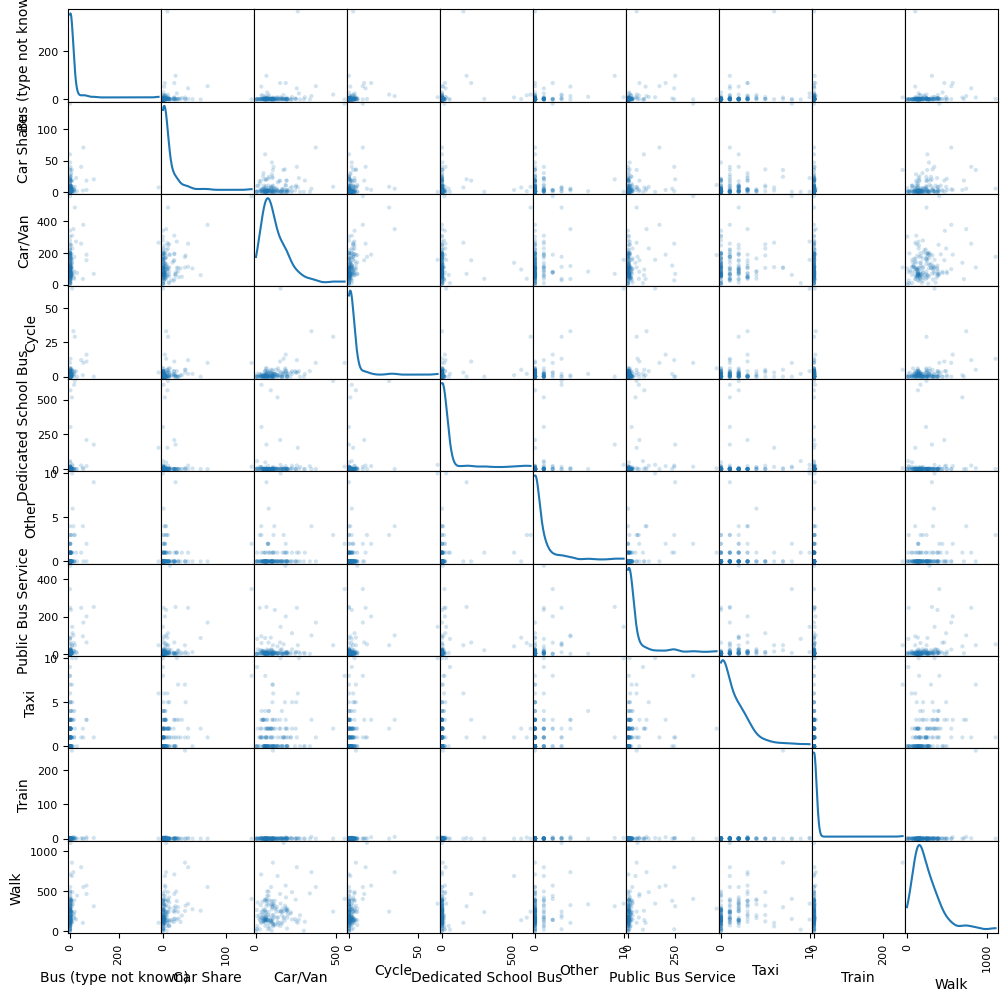

In [112]:
output = pd.plotting.scatter_matrix(scatter_matrix_sub, alpha=0.2, figsize=(12, 12), diagonal='kde')
 # plotting a scatter matrix with the new sub

In [113]:
scatter_matrix_sub.corr()

Bus (type not known)  Car Share   Car/Van     Cycle  \
Bus (type not known)              1.000000   0.073548  0.186519  0.108739   
Car Share                         0.073548   1.000000  0.387804  0.111099   
Car/Van                           0.186519   0.387804  1.000000  0.388216   
Cycle                             0.108739   0.111099  0.388216  1.000000   
Dedicated School Bus              0.195466  -0.012932  0.135930  0.202905   
Other                             0.155446   0.042421  0.108429  0.568179   
Public Bus Service                0.207805   0.426986  0.302735  0.340444   
Taxi                              0.211280   0.282409  0.175263  0.353982   
Train                             0.006692   0.139216 -0.004160  0.046703   
Walk                              0.067535   0.269337  0.232249  0.302966   

                      Dedicated School Bus     Other  Public Bus Service  \
Bus (type not known)              0.195466  0.155446            0.207805   
Car Share                        -0.012932  0.042421            0.426986   
Car/Van                           0.135930  0.108429            0.302735   
Cycle                             0.202905  0.568179            0.340444   
Dedicated School Bus              1.000000  0.225911            0.154622   
Other                             0.225911  1.000000            0.420494   
Public Bus Service                0.154622  0.420494            1.000000   
Taxi                              0.058629  0.284673            0.246010   
Train                            -0.007921 -0.014318            0.036640   
Walk                              0.069687  0.199463            0.290440   

                          Taxi     Train      Walk  
Bus (type not known)  0.211280  0.006692  0.067535  
Car Share             0.282409  0.139216  0.269337  
Car/Van               0.175263 -0.004160  0.232249  
Cycle                 0.353982  0.046703  0.302966  
Dedicated School Bus  0.058629 -0.007921  0.069687  
Other                 0.284673 -0.014318  0.199463  
Public Bus Service    0.246010  0.036640  0.290440  
Taxi                  1.000000  0.217712  0.223485  
Train                 0.217712  1.000000  0.298668  
Walk                  0.223485  0.298668  1.000000

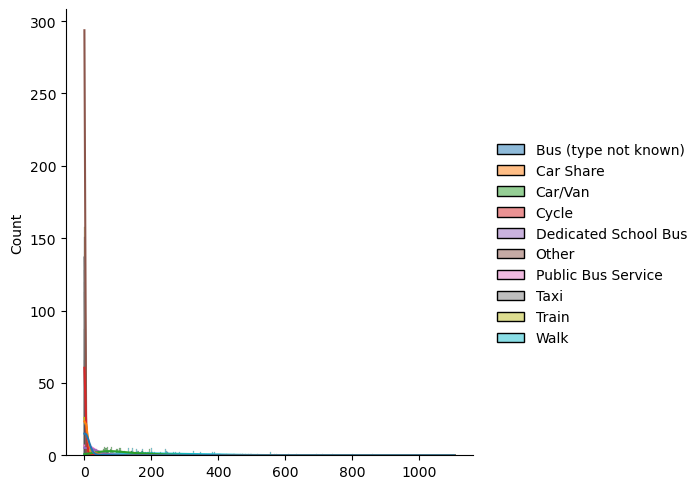

In [114]:
scatter_matrix_sub # creating a scatter matrix sub
sns.displot(data = scatter_matrix_sub, kde = True)
# It is very hard to read this scatter matrix so it is not very useful for analysis

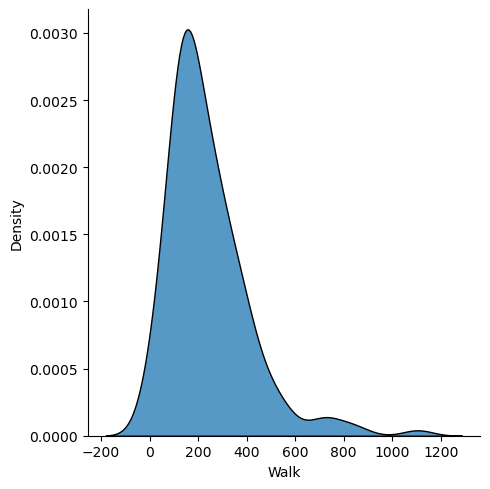

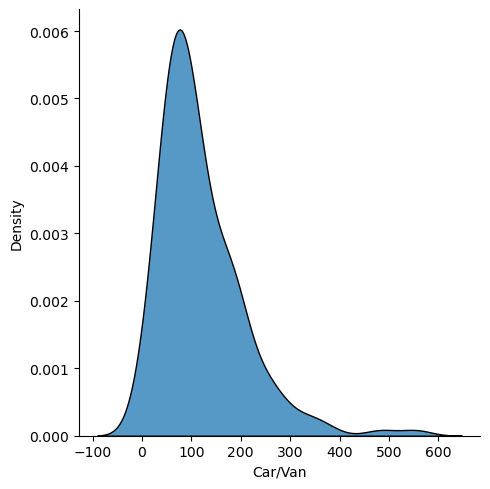

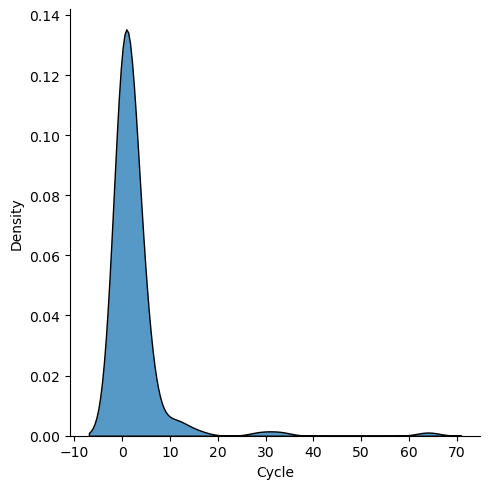

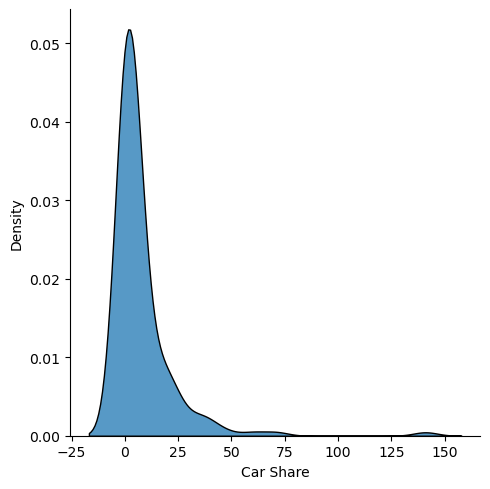

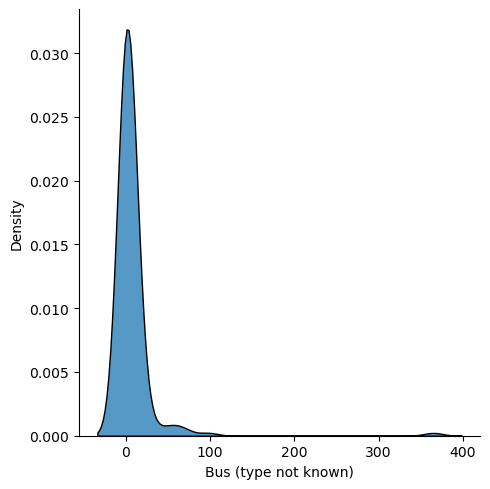

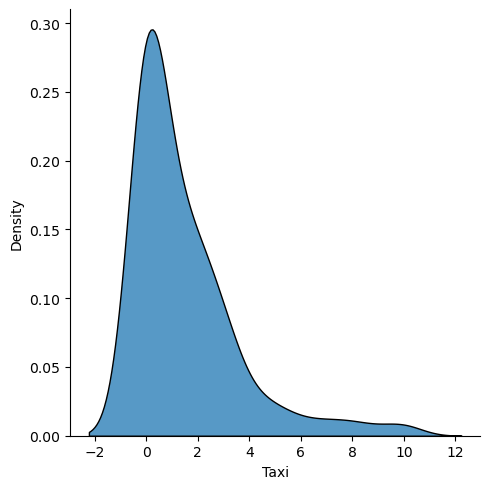

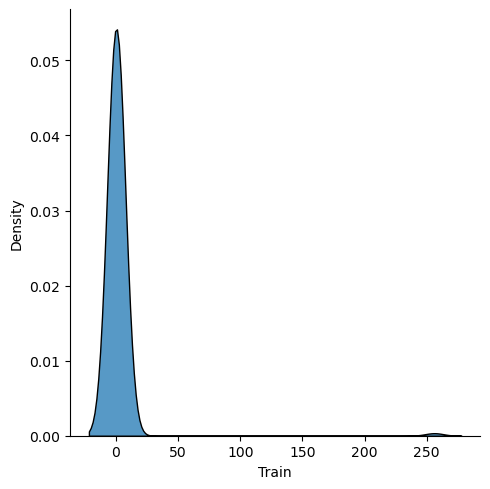

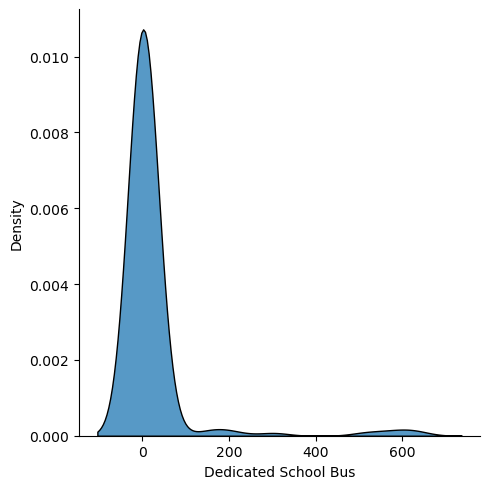

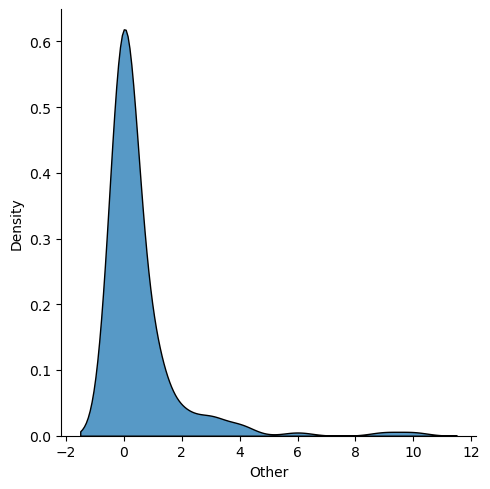

In [115]:
sns.displot(data=scatter_matrix_sub,x="Walk",kind="kde", multiple="stack")
sns.displot(data=scatter_matrix_sub,x="Car/Van",kind="kde", multiple="stack")
sns.displot(data=scatter_matrix_sub,x="Cycle",kind="kde", multiple="stack")
sns.displot(data=scatter_matrix_sub,x="Car Share",kind="kde", multiple="stack")
sns.displot(data=scatter_matrix_sub,x="Bus (type not known)",kind="kde", multiple="stack")
sns.displot(data=scatter_matrix_sub,x="Taxi",kind="kde", multiple="stack")
sns.displot(data=scatter_matrix_sub,x="Train",kind="kde", multiple="stack")
sns.displot(data=scatter_matrix_sub,x="Dedicated School Bus",kind="kde", multiple="stack")
sns.displot(data=scatter_matrix_sub,x="Other",kind="kde", multiple="stack")
# A more detailed version of the histographs presented earlier due to their fluidity of kind="kde"

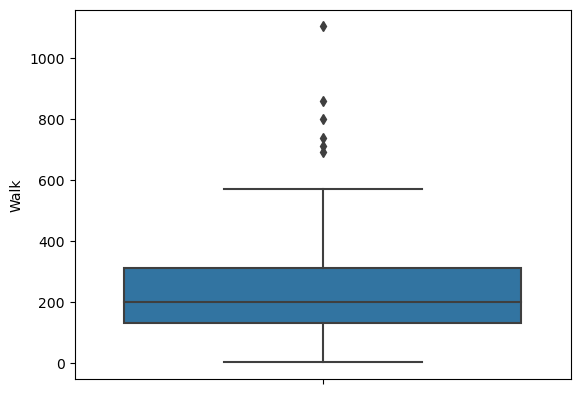

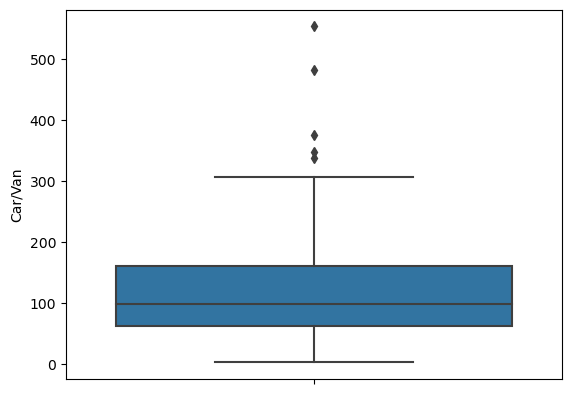

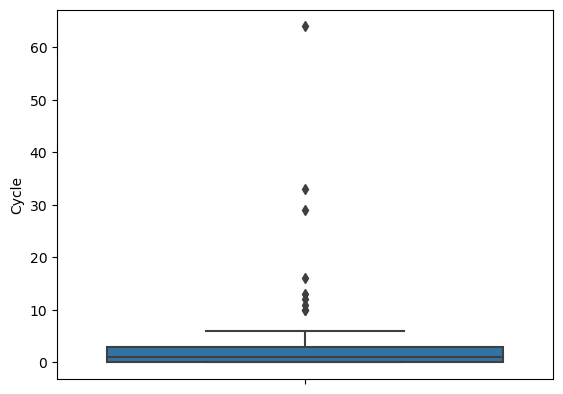

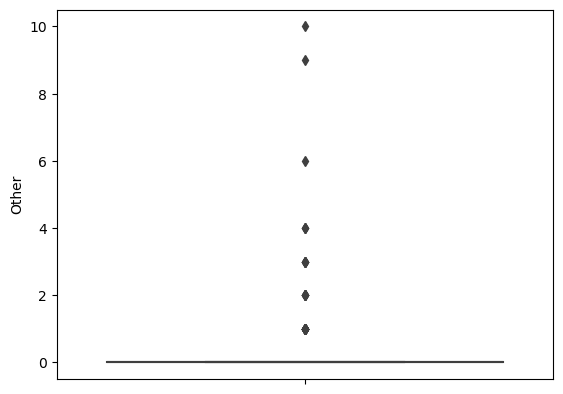

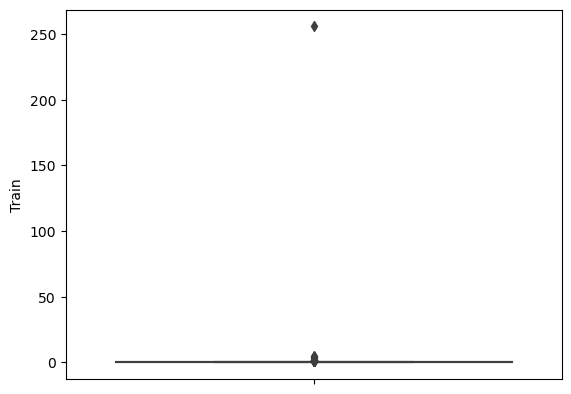

In [116]:
# Violin plots for the two most popular methods of transport, cycle, other and train

fig = sns.boxplot(data = visual, y = "Walk") 
plt.ylabel("Walk") 
plt.show()

fig = sns.boxplot(data = visual, y = "Car/Van") 
plt.ylabel("Car/Van") 
plt.show()

fig = sns.boxplot(data = visual, y = "Cycle") 
plt.ylabel("Cycle") 
plt.show()

fig = sns.boxplot(data = visual, y = "Other") 
plt.ylabel("Other") 
plt.show()

fig = sns.boxplot(data = visual, y = "Train")
plt.ylabel("Train")
plt.show()

### Linear Regression

In [117]:
import statsmodels.api as sm # for statistics modelling
from statsmodels.sandbox.regression.predstd import wls_prediction_std # for predictions

We need to first model our data to be able to make predictions

In [118]:
LR_Walk = visual['Walk'] # Creating the subs
LR_CarVan = visual["Car/Van"] # Creating the subs
LR_Train = visual["Train"] # Creating the subs ...
LR_BusTypeNotKnown = visual["Bus (type not known)"]
LR_Taxi = visual["Taxi"]
LR_Cycle = visual["Cycle"]
LR_Other = visual["Other"]
LR_PubBus = visual["Public Bus Service"]
LR_CarShare = visual["Car Share"]

In [119]:
LR1 = sm.add_constant(LR_Walk) # Adding the constant

In [120]:
mod = sm.OLS(LR_CarVan, LR1) # fitting ordinary least squares

In [121]:
results = mod.fit() # fitting mod to the results 

In [122]:
print(results.summary()) # printing

                            OLS Regression Results                            
Dep. Variable:                Car/Van   R-squared:                       0.054
Model:                            OLS   Adj. R-squared:                  0.048
Method:                 Least Squares   F-statistic:                     9.122
Date:                Fri, 03 Feb 2023   Prob (F-statistic):            0.00294
Time:                        13:37:17   Log-Likelihood:                -946.59
No. Observations:                 162   AIC:                             1897.
Df Residuals:                     160   BIC:                             1903.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         90.6265     11.464      7.905      0.0

### R-squared is 0.054 so suggests there is very weak correlation

In [123]:
LR1 = sm.add_constant(LR_Walk)
mod = sm.OLS(LR_Walk, LR1)
results = mod.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   Walk   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.319e+32
Date:                Fri, 03 Feb 2023   Prob (F-statistic):               0.00
Time:                        13:37:17   Log-Likelihood:                 4658.0
No. Observations:                 162   AIC:                            -9312.
Df Residuals:                     160   BIC:                            -9306.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7.816e-14   1.08e-14     -7.223      0.0

### To check it is working, the R-squared should be 1, as being the same it has perfect correlation, this is checked by comparing the value with itself as done above.

In [124]:
LR2 = sm.add_constant(LR_Walk)
mod = sm.OLS(LR_BusTypeNotKnown, LR2)
results = mod.fit()
print(results.summary())

                             OLS Regression Results                             
Dep. Variable:     Bus (type not known)   R-squared:                       0.005
Model:                              OLS   Adj. R-squared:                 -0.002
Method:                   Least Squares   F-statistic:                    0.7331
Date:                  Fri, 03 Feb 2023   Prob (F-statistic):              0.393
Time:                          13:37:17   Log-Likelihood:                -786.06
No. Observations:                   162   AIC:                             1576.
Df Residuals:                       160   BIC:                             1582.
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.2853      4.256

### Walking and bus (type unknown) has very weak correlation due to the R-squared value being 0.05

In [125]:
LR3 = sm.add_constant(LR_CarVan)
mod = sm.OLS(LR_Train, LR3)
results = mod.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Train   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                  0.002769
Date:                Fri, 03 Feb 2023   Prob (F-statistic):              0.958
Time:                        13:37:17   Log-Likelihood:                -715.56
No. Observations:                 162   AIC:                             1435.
Df Residuals:                     160   BIC:                             1441.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8872      2.709      0.697      0.4

### Car/van and train has no correlation 

In [126]:
LR4 = sm.add_constant(LR_BusTypeNotKnown)
mod = sm.OLS(LR_Cycle, LR4)
results = mod.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Cycle   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.914
Date:                Fri, 03 Feb 2023   Prob (F-statistic):              0.168
Time:                        13:37:17   Log-Likelihood:                -529.19
No. Observations:                 162   AIC:                             1062.
Df Residuals:                     160   BIC:                             1069.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    2.3005 

### Once again, there is extremely weak correlation between bus (type not known) and cycling to school

In [127]:
LR5 = sm.add_constant(LR_CarVan)
mod = sm.OLS(LR_CarShare, LR5)
results = mod.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              Car Share   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     28.32
Date:                Fri, 03 Feb 2023   Prob (F-statistic):           3.42e-07
Time:                        13:37:17   Log-Likelihood:                -660.56
No. Observations:                 162   AIC:                             1325.
Df Residuals:                     160   BIC:                             1331.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6918      1.929     -0.359      0.7

### The highest R-squared value is 0.150, which is still weak. It is betwen getting a car or van or car share to school.

### Below is a shapefile displaying the cycle routes around Leeds, I will be using this to determine if the presence of a cycle route near or next to a school determines the probability that students will cycle to school.

In [128]:
Cycle_Routes = gpd.read_file("PLAN_CYCLE_ROUTES.shp")  # reading in the shapefile

<AxesSubplot: >

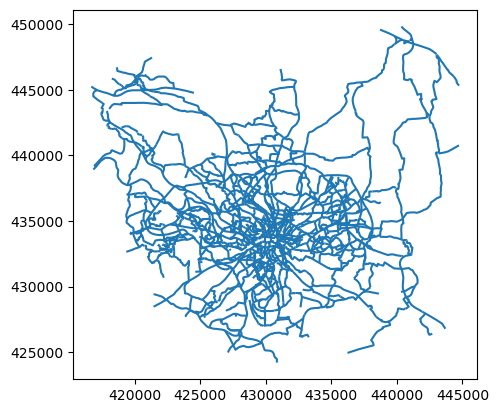

In [129]:
Cycle_Routes.plot()
# Plot displaying cycle routes around Leeds

C:\Users\leonp\anaconda3\envs\geo_env\Lib\site-packages\mapclassify\classifiers.py:238: UserWarning: Warning: Not enough unique values in array to form k classes
  Warn(
C:\Users\leonp\anaconda3\envs\geo_env\Lib\site-packages\mapclassify\classifiers.py:241: UserWarning: Warning: setting k to 4
  Warn("Warning: setting k to %d" % k_q, UserWarning)


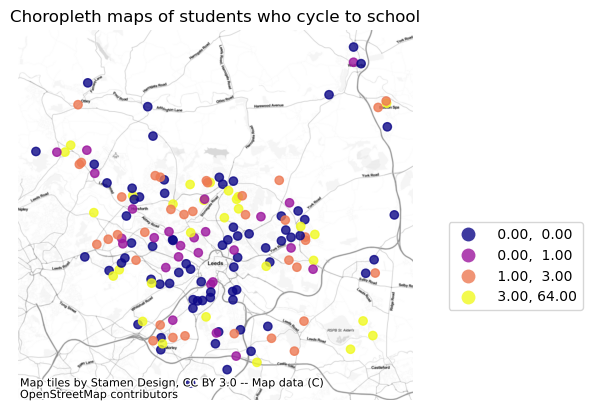

In [130]:
# # # # These look broken but still work # # # #

fig, ax = plt.subplots(1)
visual.plot(ax = ax,column = 'Cycle', scheme = 'quantiles', cmap = 'plasma', k = 5,legend = True, alpha = 0.8)
cx.add_basemap(ax, crs = Cycle_Routes.crs, source=cx.providers.Stamen.TonerLite)
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.45,0.5))
ax.set_axis_off()
ax.set_title("Choropleth maps of students who cycle to school")
plt.show()

# This is code which has already been processed above, showing students who cycle to school

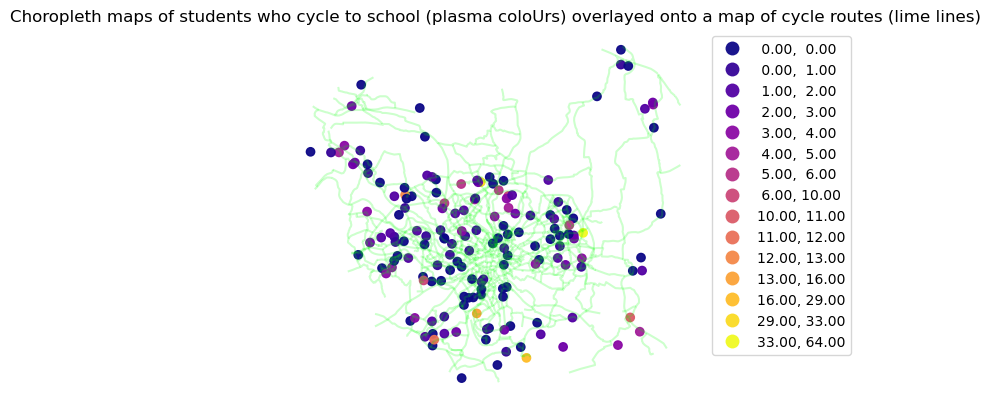

In [131]:
Cycle_Routes = gpd.read_file('PLAN_CYCLE_ROUTES.shp') # reads in the shape file
fig, ax = plt.subplots(1) # creates the subplots
visual.plot(ax = ax,column = 'Cycle', scheme = 'fisher_jenks', cmap = 'plasma',k =15,legend = True, alpha = 0.95)
# The above code uses the column "Cycle", fisher_jenks scheme to have natural incraments, plasma color for a high contrast
# view, 15 incraments and a high opacity.
leg = ax.get_legend() # adds a legend
leg.set_bbox_to_anchor((1.39,1)) # arranges the legend
ax.set_axis_off() # removes the axis
Cycle_Routes.plot(ax=ax, color='lime', edgecolor='black', alpha=0.2) # sets coloring and styles of cycle routes map
ax.set_title("Choropleth maps of students who cycle to school (plasma coloUrs) overlayed onto a map of cycle routes (lime lines)") # Adding title
plt.show() # Displays the choropleth map created

To combine the two together we can see if the schools location relative to cycle routes have an impact on if the student will cycle to school

It appears that going to a school next to a cycle path does not have a strong correlation as to whether or not you cycle to school, rather, most of the schools are already on cycle routes, however this does not change the likelihood of cycling.
Cycling to school appears to correlate to the school being on the outskirt of the city as opposed to its situation next to a cycle lane, and cycle lanes do not contribute to the likelihood of cycling into school.

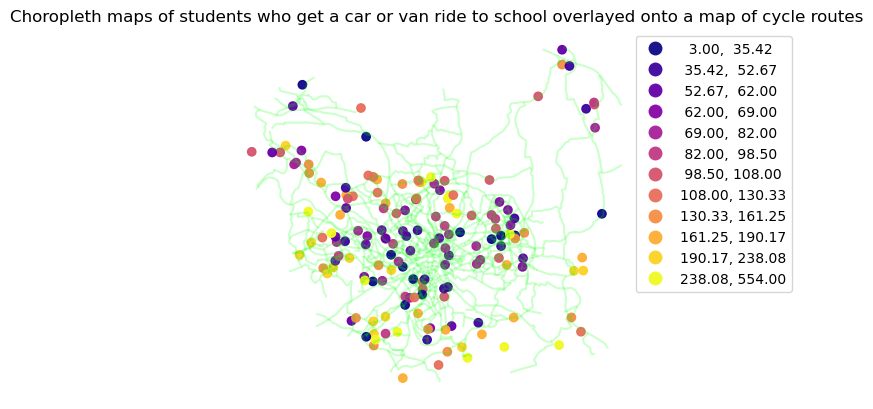

C:\Users\leonp\anaconda3\envs\geo_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


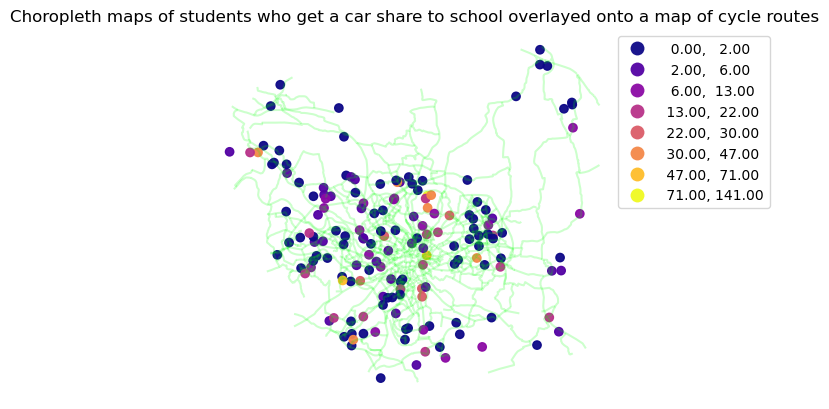

C:\Users\leonp\anaconda3\envs\geo_env\Lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


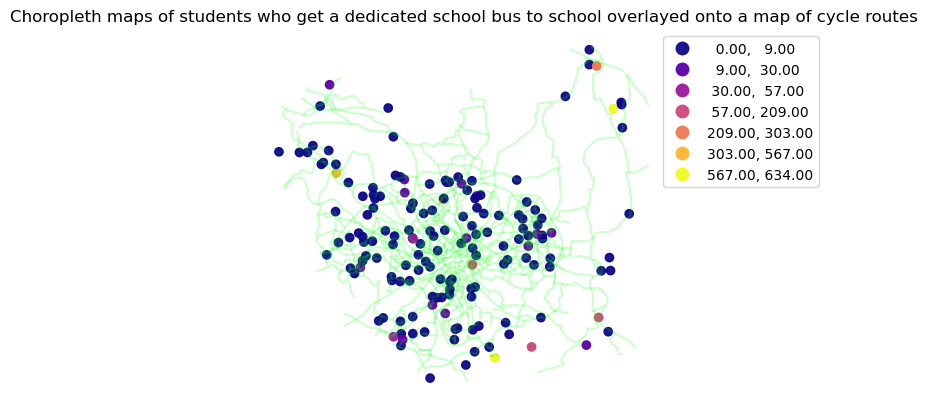

In [132]:
Cycle_Routes = gpd.read_file('PLAN_CYCLE_ROUTES.shp') # reads in the shape file
fig, ax = plt.subplots(1) # creates the subplots
visual.plot(ax = ax,column = 'Car/Van', scheme = 'quantiles', cmap = 'plasma',k =12,legend = True, alpha = 0.95)
# The above code uses the column "Cycle", fisher_jenks scheme to have natural incraments, plasma color for a high contrast
# view, 15 incraments and a high opacity.
leg = ax.get_legend() # adds a legend
leg.set_bbox_to_anchor((1.39,1)) # arranges the legend 
ax.set_axis_off() # removes the axis
Cycle_Routes.plot(ax=ax, color='lime', edgecolor='black', alpha=0.2) # sets coloring and styles of cycle routes map
ax.set_title("Choropleth maps of students who get a car or van ride to school overlayed onto a map of cycle routes") # Adding title
plt.show() # Displays the choropleth map created

Cycle_Routes = gpd.read_file('PLAN_CYCLE_ROUTES.shp') # reads in the shape file
fig, ax = plt.subplots(1) # creates the subplots
visual.plot(ax = ax,column = 'Car Share', scheme = 'natural_breaks', cmap = 'plasma',k =8,legend = True, alpha = 0.95)
# The above code uses the column "Cycle", fisher_jenks scheme to have natural incraments, plasma color for a high contrast
# view, 15 incraments and a high opacity.
leg = ax.get_legend() # adds a legend
leg.set_bbox_to_anchor((1.39,1)) # arranges the legend 
ax.set_axis_off() # removes the axis
Cycle_Routes.plot(ax=ax, color='lime', edgecolor='black', alpha=0.2) # sets coloring and styles of cycle routes map
ax.set_title("Choropleth maps of students who get a car share to school overlayed onto a map of cycle routes") # Adding title
plt.show() # Displays the choropleth map created

Cycle_Routes = gpd.read_file('PLAN_CYCLE_ROUTES.shp') # reads in the shape file
fig, ax = plt.subplots(1) # creates the subplots
visual.plot(ax = ax,column = 'Dedicated School Bus', scheme = 'natural_breaks', cmap = 'plasma',k =7,legend = True, alpha = 0.95)
# The above code uses the column "Cycle", fisher_jenks scheme to have natural incraments, plasma color for a high contrast
# view, 15 incraments and a high opacity.
leg = ax.get_legend() # adds a legend
leg.set_bbox_to_anchor((1.39,1)) # arranges the legend 
ax.set_axis_off() # removes the axis
Cycle_Routes.plot(ax=ax, color='lime', edgecolor='black', alpha=0.2) # sets coloring and styles of cycle routes map
ax.set_title("Choropleth maps of students who get a dedicated school bus to school overlayed onto a map of cycle routes") # Adding title
plt.show() # Displays the choropleth map created



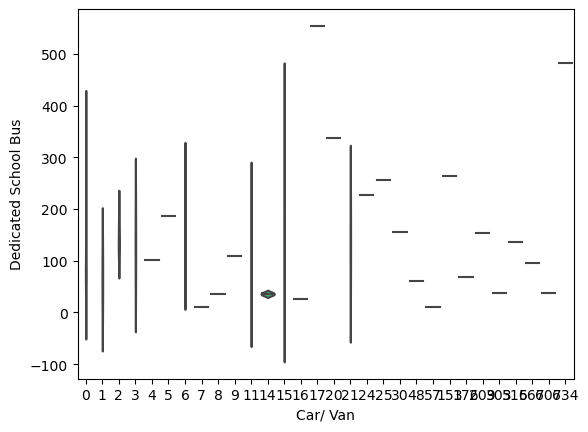

In [133]:
fig = sns.violinplot(data = visual, x = "Dedicated School Bus", y = "Car/Van", inner = 'quartile') 
plt.ylabel("Dedicated School Bus") 
plt.xlabel("Car/ Van")
plt.show()
# Here the violin plot is not useful for data analysis as there is no connection between dedicated school bus and car/van
# rides to school/ 

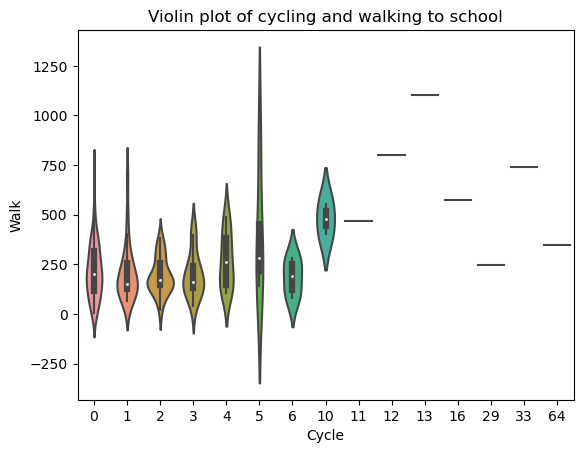

In [134]:
fig = sns.violinplot(data = visual, x = "Cycle", y = "Walk", scheme = 'natural_breaks') 
plt.ylabel("Walk") 
plt.xlabel("Cycle")
plt.title("Violin plot of cycling and walking to school")
plt.show()
# This violin plot shows there is a fairly strong correlation between cycling and walking to school.

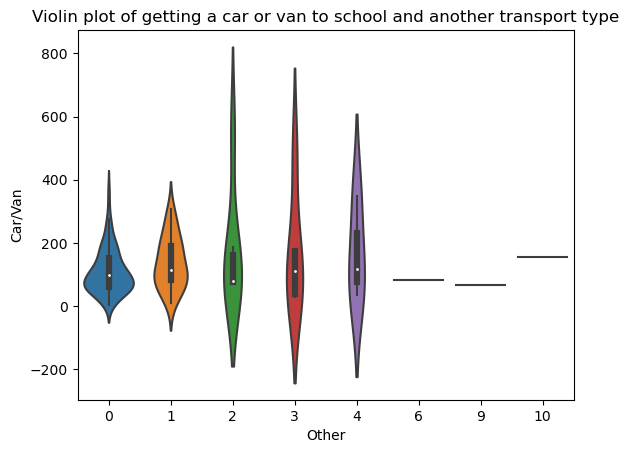

In [135]:
fig = sns.violinplot(data = visual, x = "Other", y = "Car/Van", scheme = 'natural_breaks') 
plt.ylabel("Car/Van") 
plt.xlabel("Other")
plt.title("Violin plot of getting a car or van to school and another transport type")
plt.show()
# This violin plots shows there is a fairly good correlation between getting another transport type and car/van ride to
# school. 

In [136]:
pip install scikit-learn # for machine learning and predictions

Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'


In [137]:
from sklearn.linear_model import LinearRegression

In [138]:
import statsmodels.formula.api as smf

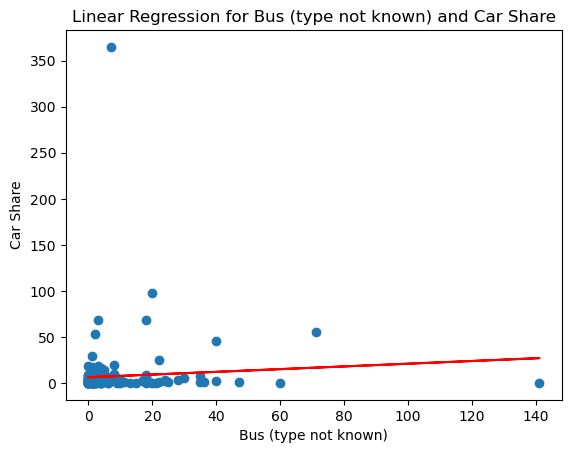

In [139]:
X1 = visual.iloc[:, 1].values.reshape(-1, 1) 
Y1 = visual.iloc[:, 0].values.reshape(-1, 1)  
linear_regressor = LinearRegression()  # creating an object for the class
linear_regressor.fit(X1, Y1)  # performing the linear regression by fitting the data
Y_pred = linear_regressor.predict(X1)  # making the predictions
plt.scatter(X1, Y1) # joining them together
plt.plot(X1, Y_pred, color='red') # plotting and colouring
plt.xlabel("Bus (type not known)")
plt.ylabel("Car Share")
plt.title("Linear Regression for Bus (type not known) and Car Share")
plt.show() # displaying the linear refgression


The prediction between bus (type not known) and car share is fairly weak

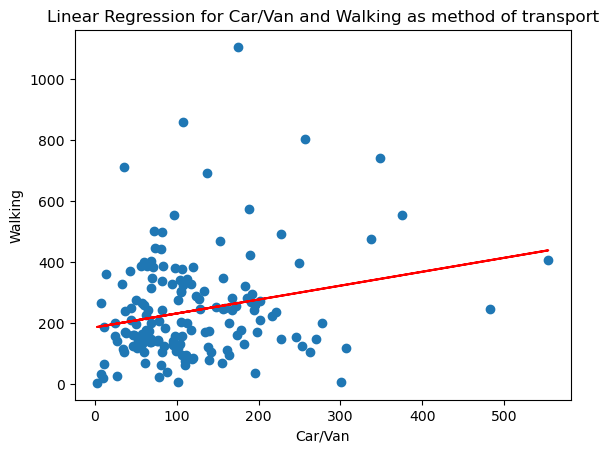

In [140]:
X1 = visual.iloc[:, 2].values.reshape(-1, 1) 
Y1 = visual.iloc[:, 9].values.reshape(-1, 1)  
linear_regressor = LinearRegression()  # creating an object for the class
linear_regressor.fit(X1, Y1)  # performing the linear regression by fitting the data
Y_pred = linear_regressor.predict(X1)  # making the predictions
plt.scatter(X1, Y1) # joining them together
plt.plot(X1, Y_pred, color='red') # plotting and colouring
plt.xlabel("Car/Van")
plt.ylabel("Walking")
plt.title("Linear Regression for Car/Van and Walking as method of transport")
plt.show() # displaying the linear refgression

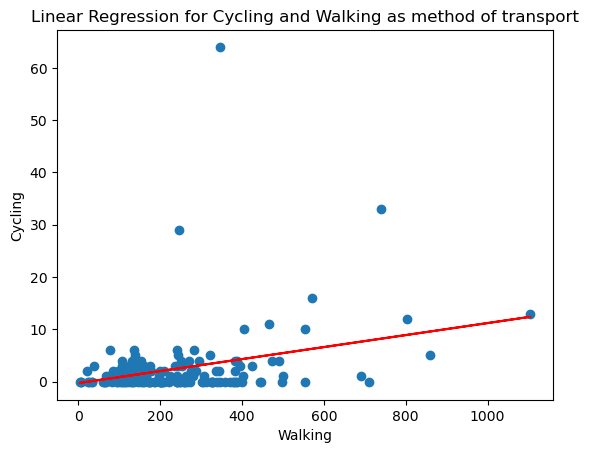

In [141]:
X1 = visual.iloc[:, 9].values.reshape(-1, 1) 
Y1 = visual.iloc[:, 3].values.reshape(-1, 1)  
linear_regressor = LinearRegression()  # creating an object for the class
linear_regressor.fit(X1, Y1)  # performing the linear regression by fitting the data
Y_pred = linear_regressor.predict(X1)  # making the predictions
plt.scatter(X1, Y1) # joining them together
plt.plot(X1, Y_pred, color='red') # plotting and colouring
plt.xlabel("Walking")
plt.ylabel("Cycling")
plt.title("Linear Regression for Cycling and Walking as method of transport")
plt.show() # displaying the linear refgression

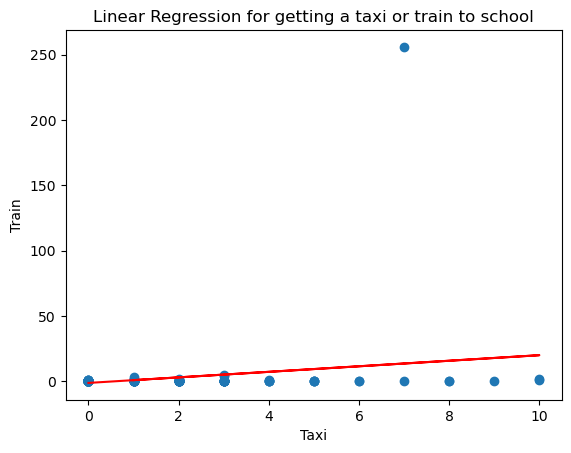

In [142]:
X1 = visual.iloc[:, 7].values.reshape(-1, 1) 
Y1 = visual.iloc[:, 8].values.reshape(-1, 1)  
linear_regressor = LinearRegression()  # creating an object for the class
linear_regressor.fit(X1, Y1)  # performing the linear regression by fitting the data
Y_pred = linear_regressor.predict(X1)  # making the predictions
plt.scatter(X1, Y1) # joining them together
plt.plot(X1, Y_pred, color='red') # plotting and colouring
plt.xlabel("Taxi")
plt.ylabel("Train")
plt.title("Linear Regression for getting a taxi or train to school")
plt.show() # displaying the linear refgression

The high lone value of around 250 is likely to have skewed the linear regression line upwards due to there being a low number of values all together for both taxi and train transportation types to school. 

### KNN Regression

In [143]:
from sklearn.neighbors import KNeighborsRegressor

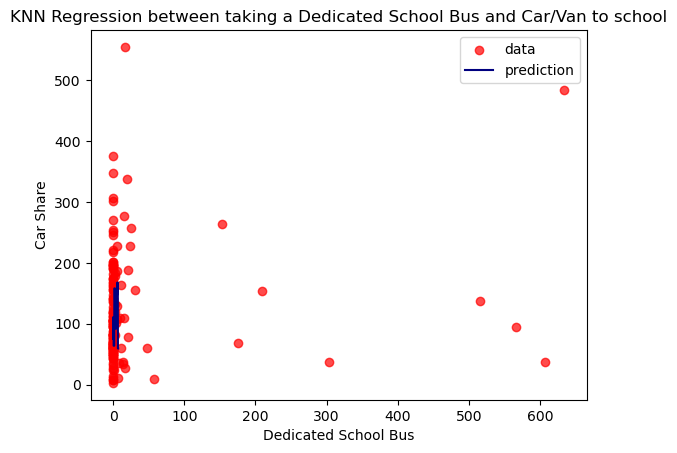

In [144]:
x = visual.iloc[:, 4].values.reshape(-1, 1) # Dedicated School Bus
y = visual.iloc[:, 2].values.reshape(-1, 1) # Car/Van

knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(x, y) # Fitting KNN regression

x_pred = np.linspace(0, 7, 3000).reshape(-1, 1)
y_pred = knn.predict(x_pred) # Predicting the model

plt.scatter(x, y, color='red', alpha = 0.7, label='data') # Data labels
plt.plot(x_pred, y_pred, color='navy', label='prediction') # Prediction labels
plt.xlabel('Dedicated School Bus') # X title
plt.ylabel('Car Share') # Y title
plt.title('KNN Regression between taking a Dedicated School Bus and Car/Van to school') # Main title
plt.legend() # Adding legend
plt.show() # Displaying the KNN regressor

The prediction plotted for KNN regression between dedicated school bus and car share transport types appears to be fairly weak likly due to a number of anomolie values present across the graph.

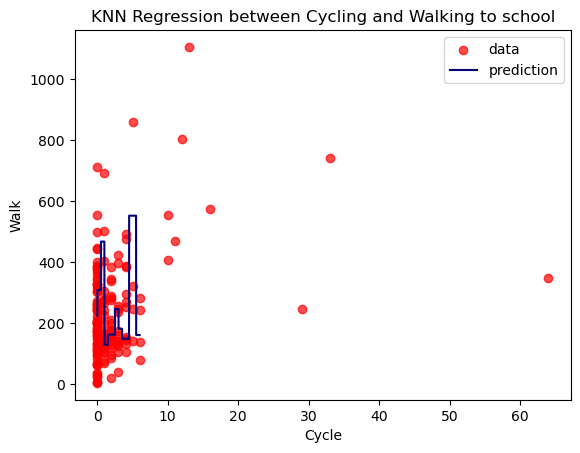

In [145]:
x = visual.iloc[:, 3].values.reshape(-1, 1) # Cycle
y = visual.iloc[:, 9].values.reshape(-1, 1) # Walk

knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(x, y) # Fitting KNN regression

x_pred = np.linspace(0, 6, 2000).reshape(-1, 1)
y_pred = knn.predict(x_pred) # Predicting the model

plt.scatter(x, y, color='red', label='data', alpha = 0.7) # Data labels
plt.plot(x_pred, y_pred, color='navy', label='prediction') # Prediction labels
plt.ylabel('Walk') # X title
plt.xlabel('Cycle') # Y title
plt.title('KNN Regression between Cycling and Walking to school') # Main title
plt.legend() # Adding legend
plt.show() # Displaying the KNN regressor

The prediction plotted here could be smotthed out to suggest there is a slight increase however it is hard to determine, a prediction between Walking and Cycling is hard to predict.

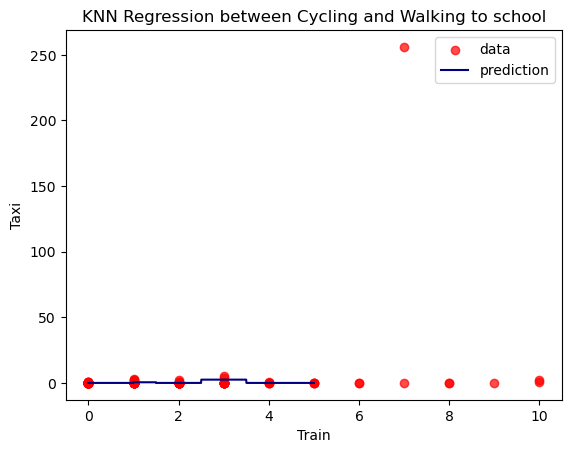

In [146]:
x = visual.iloc[:, 7].values.reshape(-1, 1) # Taxi
y = visual.iloc[:, 8].values.reshape(-1, 1) # Train

knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(x, y) # Fitting KNN regression

x_pred = np.linspace(0, 5, 1000).reshape(-1, 1)
y_pred = knn.predict(x_pred) # Predicting the model

plt.scatter(x, y, color='red', alpha = 0.7, label='data') # Data labels
plt.plot(x_pred, y_pred, color='navy', label='prediction') # Prediction labels
plt.ylabel('Taxi') # X title
plt.xlabel('Train') # Y title
plt.title('KNN Regression between Cycling and Walking to school') # Main title
plt.legend() # Adding legend
plt.show() # Displaying the KNN regressor

There is a clear and strong prediction between taking the train and taking a taxi to school, this may be due to the low recorded values for each column which makes anomolies less likly to be present.

### Using Polynomial Regression

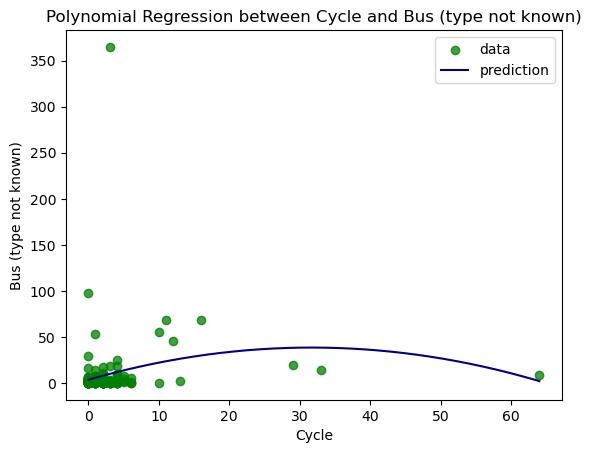

In [147]:
from sklearn.preprocessing import PolynomialFeatures # transform input features into poly terms
from sklearn.linear_model import LinearRegression # for linear regression, importing relevant libaries

X = visual.iloc[:, 3].values.reshape(-1, 1) # pulling the cycle column
Y = visual.iloc[:, 0].values.reshape(-1, 1) # pulling the bus (type not known) column

poly_features = PolynomialFeatures(degree=2) # creating Poly features
X_poly = poly_features.fit_transform(X) # transforming into Poly

lin_reg = LinearRegression() # Linear regression class creation
lin_reg.fit(X_poly, Y)

X_pred = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1) # np array is created
X_pred_poly = poly_features.fit_transform(X_pred) # x data being transformed into poly features by using .fit_transform
Y_pred = lin_reg.predict(X_pred_poly)

plt.scatter(X, Y, color='green', alpha = 0.75,label='data') # Styling
plt.plot(X_pred, Y_pred, color='navy', label='prediction') # Colouring
plt.xlabel('Cycle') # Naming X axis
plt.ylabel('Bus (type not known)') # Naming Y axis
plt.title('Polynomial Regression between Cycle and Bus (type not known)') # Adding the title
plt.legend()  #Adding the legend
plt.show() # Displaying

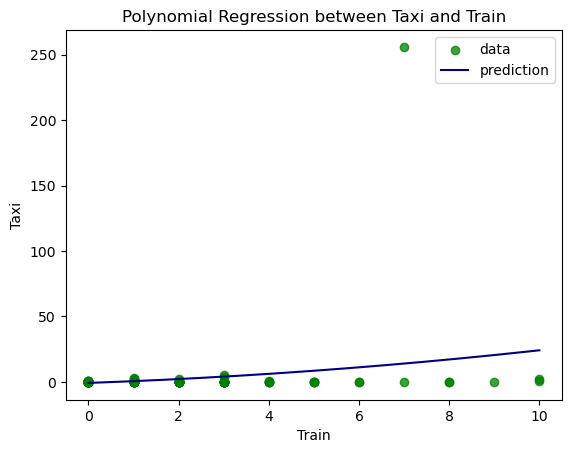

In [148]:
X = visual.iloc[:, 7].values.reshape(-1, 1) 
Y = visual.iloc[:, 8].values.reshape(-1, 1) 
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, Y)
X_pred = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
X_pred_poly = poly_features.fit_transform(X_pred)
Y_pred = lin_reg.predict(X_pred_poly)
plt.scatter(X, Y, color='green', alpha = 0.75,label='data')
plt.plot(X_pred, Y_pred, color='navy', label='prediction')
plt.xlabel('Train')
plt.ylabel('Taxi')
plt.title('Polynomial Regression between Taxi and Train')
plt.legend()
plt.show()

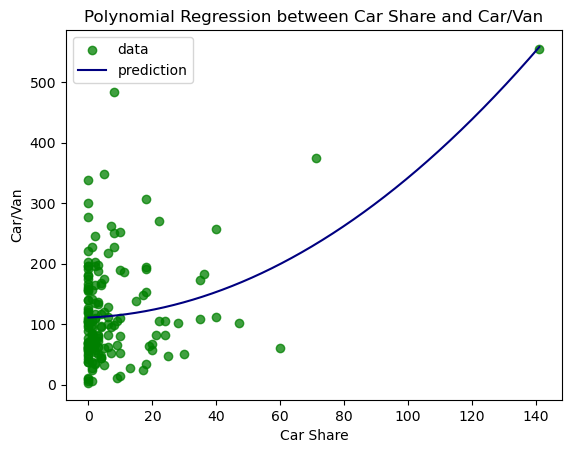

In [149]:
X = visual.iloc[:, 1].values.reshape(-1, 1)
Y = visual.iloc[:, 2].values.reshape(-1, 1) 

poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, Y)

X_pred = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
X_pred_poly = poly_features.fit_transform(X_pred)
Y_pred = lin_reg.predict(X_pred_poly)

plt.scatter(X, Y, color='green', alpha = 0.75,label='data')
plt.plot(X_pred, Y_pred, color='navy', label='prediction')
plt.xlabel('Car Share')
plt.ylabel('Car/Van')
plt.title('Polynomial Regression between Car Share and Car/Van')
plt.legend()
plt.show()

This prediction shows there is likly to the increase in Car Shares is associated with an increase in Car/Van and vice versa.

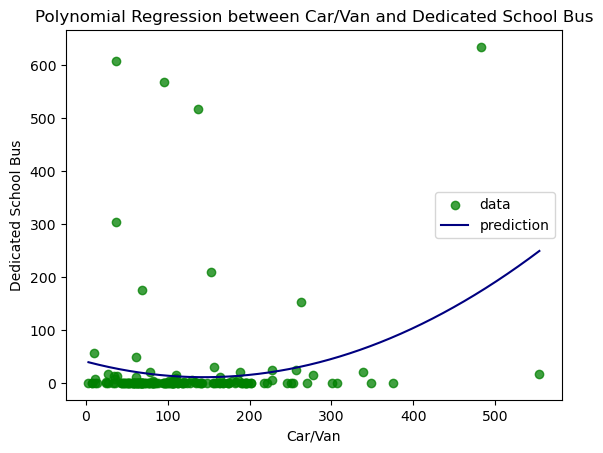

In [150]:
X = visual.iloc[:, 2].values.reshape(-1, 1) # Car/Van
Y = visual.iloc[:, 4].values.reshape(-1, 1) # Dedicated School Bus
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, Y)
X_pred = np.linspace(X.min(), X.max(), 1200).reshape(-1, 1)
X_pred_poly = poly_features.fit_transform(X_pred)
Y_pred = lin_reg.predict(X_pred_poly)
plt.scatter(X, Y, color='green', alpha = 0.75,label='data')
plt.plot(X_pred, Y_pred, color='navy', label='prediction')
plt.xlabel('Car/Van')
plt.ylabel('Dedicated School Bus')
plt.title('Polynomial Regression between Car/Van and Dedicated School Bus')
plt.legend()
plt.show()

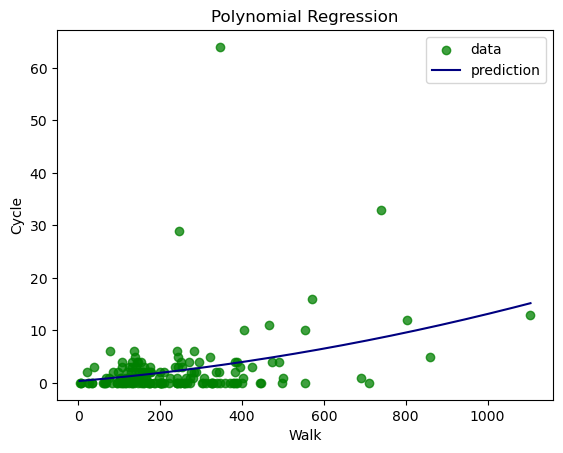

In [151]:
X = visual.iloc[:, 9].values.reshape(-1, 1) 
Y = visual.iloc[:, 3].values.reshape(-1, 1) 

poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, Y)

X_pred = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
X_pred_poly = poly_features.fit_transform(X_pred)
Y_pred = lin_reg.predict(X_pred_poly)

plt.scatter(X, Y, color='green', alpha = 0.75,label='data')
plt.plot(X_pred, Y_pred, color='navy', label='prediction')
plt.xlabel('Walk')
plt.ylabel('Cycle')
plt.title('Polynomial Regression')
plt.legend()
plt.show()

 ## Results and Discussion

In answering the research questions, the majority of school children in Leeds use a Car/Van to get to school (assuming they are not the one driving it), followed second by walking to school. This could therefore be an area tackled by campaigns to promote more sustainable and healthy travel to schools, as previously mentioned active travel have have significant health benefits for school children.

Religion does not appear to affect travel to school, only a small number of schools in Leeds are religious schools so any patterns would be difficult to see, and within the small number of religious school there does not appear to be any single determining values.

In [152]:
LOCATION_DF["ReligiousCharacter"].value_counts()

Does not apply       178
Church of England     41
None                  35
Roman Catholic        31
Jewish                 2
No Info                2
Name: ReligiousCharacter, dtype: int64

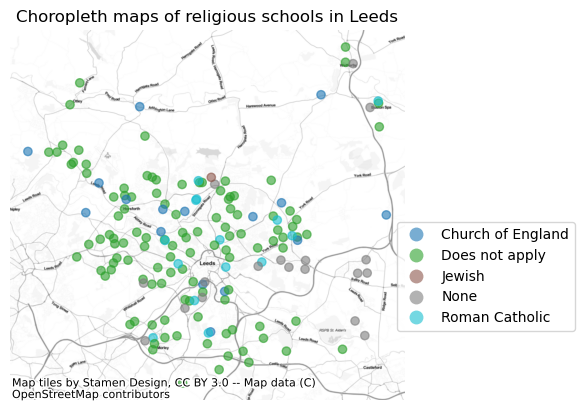

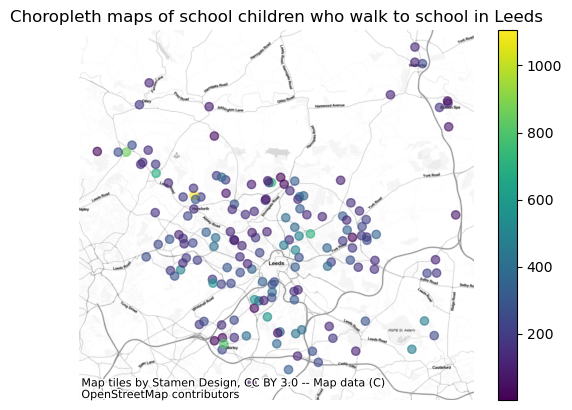

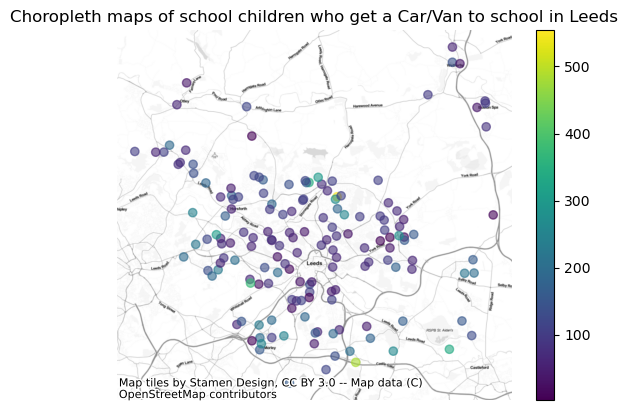

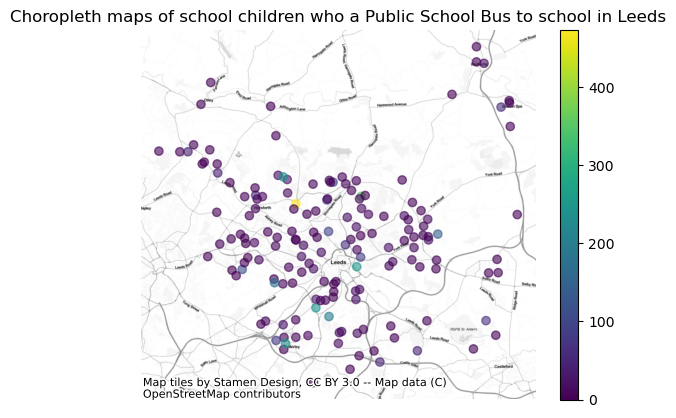

In [153]:
fig, ax = plt.subplots(1)
visual.plot(ax = ax, column = 'ReligiousCharacter',  legend = True, alpha = 0.6)
cx.add_basemap(ax, crs = visual.crs, source=cx.providers.Stamen.TonerLite)
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.45,0.5))
ax.set_axis_off()
ax.set_title("Choropleth maps of religious schools in Leeds")
plt.show()

fig, ax = plt.subplots(1)
visual.plot(ax = ax, column =  "Walk",  legend = True, alpha = 0.6)
cx.add_basemap(ax, crs = visual.crs, source=cx.providers.Stamen.TonerLite)
leg = ax.get_legend()
ax.set_axis_off()
ax.set_title("Choropleth maps of school children who walk to school in Leeds")
plt.show()

fig, ax = plt.subplots(1)
visual.plot(ax = ax, column =  "Car/Van",  legend = True, alpha = 0.6)
cx.add_basemap(ax, crs = visual.crs, source=cx.providers.Stamen.TonerLite)
leg = ax.get_legend()
ax.set_axis_off()
ax.set_title("Choropleth maps of school children who get a Car/Van to school in Leeds")
plt.show()

fig, ax = plt.subplots(1)
visual.plot(ax = ax, column =  "Public Bus Service",  legend = True, alpha = 0.6)
cx.add_basemap(ax, crs = visual.crs, source=cx.providers.Stamen.TonerLite)
leg = ax.get_legend()
ax.set_axis_off()
ax.set_title("Choropleth maps of school children who a Public School Bus to school in Leeds")
plt.show()

There appers to be some relation between the choices in transport types used to travel to school. 3 classes can be seen, there are pedestrian friendly schools (Walk or Cycle), Public Transport schools (Train, Public Bus Service), and private transport schools (Car/Van, Car Share, Taxi). If one school has a high count for one of the values in these classes they are more likly to also have a high count of the other values in the same class.

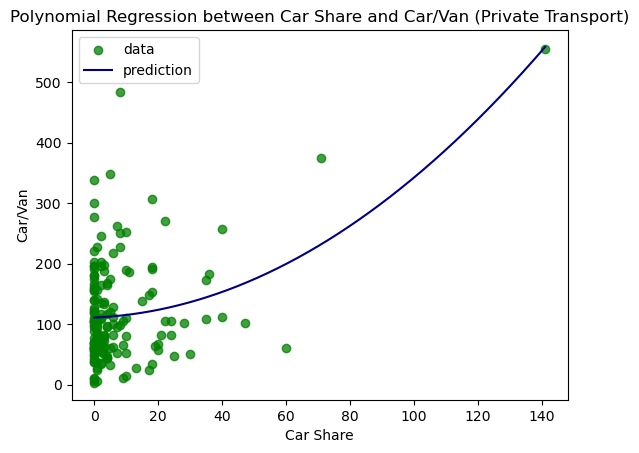

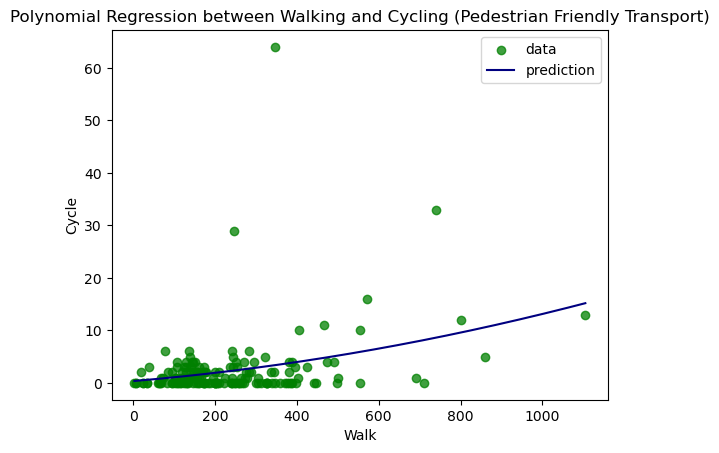

In [154]:
X = visual.iloc[:, 1].values.reshape(-1, 1) 
Y = visual.iloc[:, 2].values.reshape(-1, 1) 
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, Y)
X_pred = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
X_pred_poly = poly_features.fit_transform(X_pred)
Y_pred = lin_reg.predict(X_pred_poly)
plt.scatter(X, Y, color='green', alpha = 0.75,label='data')
plt.plot(X_pred, Y_pred, color='navy', label='prediction')
plt.xlabel('Car Share')
plt.ylabel('Car/Van')
plt.title('Polynomial Regression between Car Share and Car/Van (Private Transport)')
plt.legend()
plt.show()


X = visual.iloc[:, 9].values.reshape(-1, 1) 
Y = visual.iloc[:, 3].values.reshape(-1, 1) 
poly_features = PolynomialFeatures(degree=2)
X_poly = poly_features.fit_transform(X)
lin_reg = LinearRegression()
lin_reg.fit(X_poly, Y)
X_pred = np.linspace(X.min(), X.max(), 1000).reshape(-1, 1)
X_pred_poly = poly_features.fit_transform(X_pred)
Y_pred = lin_reg.predict(X_pred_poly)
plt.scatter(X, Y, color='green', alpha = 0.75,label='data')
plt.plot(X_pred, Y_pred, color='navy', label='prediction')
plt.xlabel('Walk')
plt.ylabel('Cycle')
plt.title('Polynomial Regression between Walking and Cycling (Pedestrian Friendly Transport)')
plt.legend()
plt.show()

Cycling infrastructure does not appear to have an affect on the proportion of cyclists, despite many schools being on cycle routes, this could be due to a concern over safety for younger children, and thus better cycling infrastructure would be required to increase the proportion of students who cycle to school. Factors affecting the likelihood of cycling to school appear to be location relative to the suburbs, with inner city and rural areas tending to have the least amount of cyclists to schools.

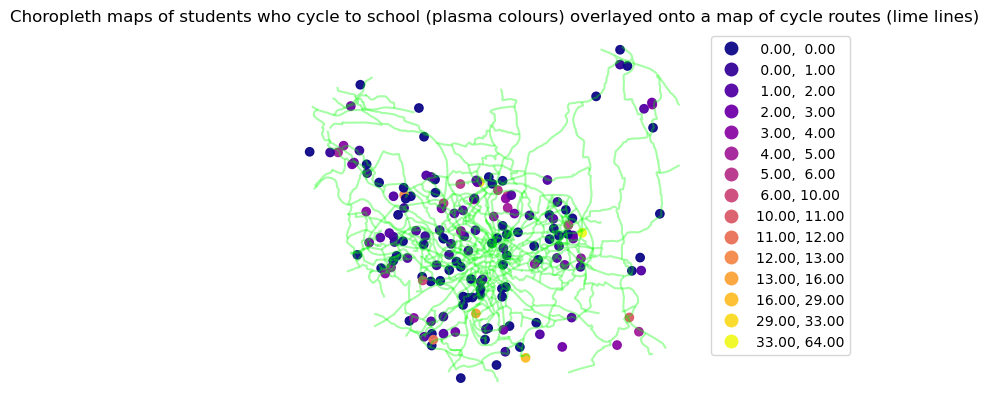

In [155]:
Cycle_Routes = gpd.read_file('PLAN_CYCLE_ROUTES.shp') 
fig, ax = plt.subplots(1) 
visual.plot(ax = ax,column = 'Cycle', scheme = 'fisher_jenks', cmap = 'plasma',k =15,legend = True, alpha = 0.95)
leg = ax.get_legend() 
leg.set_bbox_to_anchor((1.39,1)) 
ax.set_axis_off() 
Cycle_Routes.plot(ax=ax, color='lime', edgecolor='black', alpha=0.35) 
ax.set_title("Choropleth maps of students who cycle to school (plasma colours) overlayed onto a map of cycle routes (lime lines)")
plt.show() 

The choice in method of transport to schools in Leeds does not appear to be affected by any particular values. One determining factor is if one school has many students who get a Car/Van ride to school that school is also likly to have a high amount of students who take similar (private-motorised) transport such as car share or taxi, the same is true for the relation between walking and cycling to school (pedestrian friendly). These pedestrian friendly schools are more likely situated in the suburbs of Leeds away from the city centre.
Religion does not appear to play a factor in determining the transport choice in addition to the presence of a cycle route in relative proximity to the school, this is likely down to school children or their parents not feelig safe about them using the cycle paths as they consider them to be a danger, this may also suggest why schools with a high number of cyclists are situated away from the city centre.


 ## Conclusion

Overall school children in Leeds have potential to adopt a more active form of transport, this would be vastly benefitical for their physical and mental health, as well as would potentially decrease air pollution and traffic congestion within Leeds. Many schools in Leeds are situated on cycle routes, however the children do not appear to want to use the cycle routes and instead have other unknown factors (potentially living in the suburbs where traffic is quieter) for choosing how to get to school. There could be a campaign and shift in views towards Leeds becoming a more cycle friendly city, current schemes to increase the safety and visibility of cycle lanes on cycle routes such as the ambitious proposal to construct safer cycle lanes along Otley Road (Leeds.gov.uk, 2023).
There was overall little correlation between transport types than expected

Schools in Leeds can be classified into 3 categories as mentioned previously (pedestrian friendly, private motor, and public transport), if one school has a high number of students for a variable in one of the classes, it is likely they will have a high amount of students taking another transport variable type from the same class. Further research could seek to investigate why the schools categories as having prodominatley "private motor" transport useage do so, and could offer alternatives to promote them to becoming a school with a "public transport" or "pedestrian friendly" transport travel type.

 ## References

Aubert, S. Barnes, J, D. Abdeta, C. Nader, P, A. Adeniyi, A, F. Aguillar-Farias, N. (2018). Global Matrix 3.0 Physical Activity Report Card Grade for Children and Youth: Results and analysis from 49 countries. J Phys Act Health 15. pp 251-273. 

De Vries, S, I. Hopman-Rock, M. Bakker, I. Hirasing, R, A. Van Mechelen, W. (2010). "Built Environmental Correlates of Walking and Cycling in Dutch Urban Children". Results from the SPACE Study. Int. J. Environ. Res. Public Health, volume 7, pp 2309-2324. https://doi.org/10.3390/ijerph7052309

Garling, T. Ettema, D. Friman, M. (2014). "Handbook of Sustainable Travel" New York, NY, USA: Springer. 

Kirby, J. and Inchley, J. (2009). "Active travel to school: views of 10‐13 year old schoolchildren in Scotland", Health Education, Vol 109 (Issue 2), pp. 169-183. https://doi.org/10.1108/09654280910936611

Laverty, A, A. Mindell, J, S., Webb, E, A. and Millett, C. (2013). "Active travel to work and cardiovascular risk factors in the United Kingdom". American Journal of Preventive Medicine, Volume 45 (Issue 3), pp.282-288.

LEEDS.GOV.UK, 2023. "Feedback on plans to improve safety and street design of A660 Otley Road, Headingley Lane and Woodhouse Lane" 30th Jan. Available at: https://news.leeds.gov.uk/news/a660-otley-road-headingley-lane-and-woodhouse-lane (Accessed 02/02/2023). 

Public Health England. (2015). "UK Prevalence: Percentage of Children Obese and Overweight(Including Obese) in the UK and Ireland".https://www.noo.org.uk/NOO_about_obesity/child_obesity/UK_prevalence

Rabl, A. (2012). "Benefits of shift from car to active transport". Transport Policy. Volume 19 (Issue 1). pp 121-131. https://doi.org/10.1016/j.tranpol.2011.09.008 

Sahlqvist, S., Song, Y. and Ogilvie, D. (2012). "Is active travel associated with greater physical activity? The contribution of commuting and non-commuting active travel to total physical activity in adults". Preventive medicine. Volume 55 (Issue 3), pp.206-211.

Welsh Government.(2015).Preventative Action–Childhood Obesity.http://gov.wales/topics/improvingservices/public-services-leadership-panel/nwp/effectservices/preventative-action-childhood-obesity/?lang=en.

Woodcock J., Edwards, P., Tonne, C., Armstrong, B.G., Ashiru, O., Banister, D., Beevers, S., Chalabi, Z., Chowdhury, Z., Cohen, A., Franco, O.H., Haines, A., Hickman, R., Lindsay, G., Mittal, I., Mohan, D., Tiwari, G., Woodward, A., Roberts, I. (2009). Public health benefits of strategies to reduce greenhouse-gas emissions: urban land trans-port. pp 1930-1943. https://doi.org/10.1016/S0140-6736(09)61714-1

World Health Organisation. (2018). Global Action Plan on Physical Activity 2018-2030: More Active People For a Healthier World. p 104.https://doi.org/10.1123/jpah.2018-0472.

In [156]:
print ("Done :)")

Done :)
